## **Code : Results Cleanup ver.3 (KEEI)**
- Writer : Donghyeon Kim
- Date : 2022.09.21.
- 대상 : 통합 데이터(태양광 사용 3kW & 미사용)
- 주택형태 : 단독주택

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_root_use2 : 태양광 사용자 이름 호출(단독주택 한정)
# get_name_root_not2 : 태양광 미사용자 이름 호출(단독주택 한정)
from pack_utils import get_project_root, get_name_root, get_name_root_use3, get_name_root_not2

### **Data**
#### 1) Hour(1시간 단위)

In [3]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_hour_3kw.xlsx')
df_all_hour = pd.read_excel(file_name)

# Filtering
# (1) Using Solar
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

# (2) Not Using Solar
df_all_hour_not = df_all_hour[df_all_hour.type == 'not']

In [4]:
df_all_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244432 entries, 0 to 244431
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    244432 non-null  int64  
 1   연도                      244432 non-null  int64  
 2   월                       244432 non-null  int64  
 3   일                       244432 non-null  int64  
 4   시간                      244432 non-null  int64  
 5   설비용량(kW)                78276 non-null   object 
 6   발전량(kWh)                78276 non-null   float64
 7   전력소비량(kWh)              244432 non-null  float64
 8   수전전력량(kWh)              244432 non-null  float64
 9   잉여전력량(kWh)              78276 non-null   float64
 10  잉여전력량/발전량               38468 non-null   float64
 11  자가소비율                   78275 non-null   float64
 12  자가공급률                   78276 non-null   float64
 13  temperature             244432 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [5]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name2 = os.path.join(folder_root, 'all_concat_day_3kw.xlsx')
df_all_day = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_day_use = df_all_day[df_all_day.type == 'use']

# (2) Not Using Solar
df_all_day_not = df_all_day[df_all_day.type == 'not']

In [6]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        10545 non-null  int64  
 1   연도          10545 non-null  int64  
 2   월           10545 non-null  int64  
 3   일           10545 non-null  int64  
 4   설비용량(kW)    3343 non-null   object 
 5   발전량(kWh)    3343 non-null   float64
 6   발전시간        3343 non-null   float64
 7   이용률         3343 non-null   float64
 8   전력소비량(kWh)  10545 non-null  float64
 9   수전전력량(kWh)  10545 non-null  float64
 10  잉여전력량(kWh)  3343 non-null   float64
 11  잉여전력량/발전량   3340 non-null   float64
 12  자가소비율       3340 non-null   float64
 13  자가공급률       3343 non-null   float64
 14  type        10545 non-null  object 
 15  owner       10545 non-null  object 
 16  ym          10545 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.4+ MB


<hr>

## **<평균>**

### **1. 월간/계절별/1년 가구당 평균 전력 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [7]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['전력소비량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['전력소비량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,use,not
2021/5,347.9,243.3
2021/6,336.9,233.1
2021/7,490.2,345.5
2021/8,473.1,330.2
2021/9,370.9,270.4
2021/10,382.4,244.0
2021/11,405.8,264.7
2021/12,450.8,298.3
2022/1,525.6,309.9
2022/2,423.1,294.2


In [8]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_spring = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_not_summer = df_all_day_not[(df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') | (df_all_day_not.ym == '2021/8')]
    
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_not_autumn = df_all_day_not[(df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') | (df_all_day_not.ym == '2021/11')]
    
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]
df_all_day_not_winter = df_all_day_not[(df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') | (df_all_day_not.ym == '2022/2')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['전력소비량(kWh)'])
not_consum_spring = np.sum(df_all_day_not_spring['전력소비량(kWh)'])
    
use_consum_summer = np.sum(df_all_day_use_summer['전력소비량(kWh)'])
not_consum_summer = np.sum(df_all_day_not_summer['전력소비량(kWh)'])
    
use_consum_autumn = np.sum(df_all_day_use_autumn['전력소비량(kWh)'])
not_consum_autumn = np.sum(df_all_day_not_autumn['전력소비량(kWh)'])
    
use_consum_winter = np.sum(df_all_day_use_winter['전력소비량(kWh)'])
not_consum_winter = np.sum(df_all_day_not_winter['전력소비량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
not_consum_spring_mean = round(not_consum_spring / (len(df_all_day_not_spring.owner.unique())*3), 1)

use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
not_consum_summer_mean = round(not_consum_summer / (len(df_all_day_not_summer.owner.unique())*3), 1)
    
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
not_consum_autumn_mean = round(not_consum_autumn / (len(df_all_day_not_autumn.owner.unique())*3), 1)
    
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
not_consum_winter_mean = round(not_consum_winter / (len(df_all_day_not_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['use'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]
result['not'] = [not_consum_spring_mean, not_consum_summer_mean, not_consum_autumn_mean, not_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

,use,not
spring,369.6,241.4
summer,433.4,302.9
autumn,386.3,259.7
winter,466.5,300.8


In [9]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_year = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') |
                                    (df_all_day_not.ym == '2021/8') | (df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') |
                                    (df_all_day_not.ym == '2021/11') | (df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') |
                                    (df_all_day_not.ym == '2022/2') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['전력소비량(kWh)'])
not_consum_year = np.sum(df_all_day_not_year['전력소비량(kWh)'])
    
# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)
not_consum_year_mean = round(not_consum_year / (len(df_all_day_not_year.owner.unique())*12), 1)
    
# 4) 값 넣기
result['use'] = use_consum_year_mean
result['not'] = not_consum_year_mean

result

{'use': 414.0, 'not': 276.2}

<hr>

### **2. 월간/계절별/1년 평균 가구당 전력 생산량(발전량)**
- 태양광 사용 가구

In [10]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['발전량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['발전량(kWh)'].append(use_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,발전량(kWh)
2021/5,370.8
2021/6,363.2
2021/7,360.1
2021/8,287.6
2021/9,291.4
2021/10,320.9
2021/11,259.8
2021/12,256.0
2022/1,290.4
2022/2,320.3


In [11]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['발전량(kWh)'])
use_consum_summer = np.sum(df_all_day_use_summer['발전량(kWh)'])
use_consum_autumn = np.sum(df_all_day_use_autumn['발전량(kWh)'])
use_consum_winter = np.sum(df_all_day_use_winter['발전량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['발전량(kWh)'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

,발전량(kWh)
spring,372.8
summer,336.9
autumn,290.7
winter,288.9


In [12]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['발전량(kWh)'])

# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)

# 4) 값 넣기
result['발전량(kWh)'] = use_consum_year_mean

result

{'발전량(kWh)': 322.4}

<hr>

### **3. 월간/계절별/1년 평균 가구당 전력 수출량(잉여전력량)**
- 태양광 사용 가구

In [13]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_export = np.sum(df_all_day_use_f['잉여전력량(kWh)'])
    
    # 3) 평균 구하기
    use_export_mean = round(use_export / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['잉여전력량(kWh)'].append(use_export_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,잉여전력량(kWh)
2021/5,254.2
2021/6,233.1
2021/7,192.6
2021/8,150.2
2021/9,178.7
2021/10,212.9
2021/11,167.9
2021/12,154.2
2022/1,163.2
2022/2,197.4


In [14]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['잉여전력량(kWh)'])
use_consum_summer = np.sum(df_all_day_use_summer['잉여전력량(kWh)'])
use_consum_autumn = np.sum(df_all_day_use_autumn['잉여전력량(kWh)'])
use_consum_winter = np.sum(df_all_day_use_winter['잉여전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['잉여전력량(kWh)'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

,잉여전력량(kWh)
spring,255.0
summer,192.0
autumn,186.5
winter,171.6


In [15]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['잉여전력량(kWh)'])

# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)

# 4) 값 넣기
result['잉여전력량(kWh)'] = use_consum_year_mean

result

{'잉여전력량(kWh)': 201.3}

<hr>

### **4. SSR, SCR, 설비이용률, 발전시간**
- 태양광 사용 가구

In [16]:
# Result Dictionary
result = {}
result['SSR'] = []
result['SCR'] = []
result['설비이용률'] = []
result['발전시간'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    ssr = np.sum(df_all_day_use_f['자가공급률'])
    scr = np.sum(df_all_day_use_f['자가소비율'])
    use_rate = np.sum(df_all_day_use_f['이용률'])
    use_hour = np.sum(df_all_day_use_f['발전시간'])
    
    # 3) 평균 구하기
    ssr_mean = round(ssr / len(df_all_day_use_f), 2)
    scr_mean = round(scr / len(df_all_day_use_f), 2)
    use_rate_mean = round(use_rate / len(df_all_day_use_f), 2)
    use_hour_mean = round(use_hour / len(df_all_day_use_f), 2)
    
    # 4) 값 넣기
    result['SSR'].append(ssr_mean)
    result['SCR'].append(scr_mean)
    result['설비이용률'].append(use_rate_mean)
    result['발전시간'].append(use_hour_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,SSR,SCR,설비이용률,발전시간
2021/5,0.35,0.40,16.61,3.99
2021/6,0.39,0.41,16.81,4.04
2021/7,0.36,0.50,16.13,3.87
2021/8,0.31,0.55,12.89,3.09
2021/9,0.32,0.47,13.49,3.24
2021/10,0.29,0.41,14.38,3.45
2021/11,0.23,0.42,12.03,2.89
2021/12,0.23,0.45,11.47,2.75
2022/1,0.24,0.48,13.01,3.12
2022/2,0.29,0.42,15.89,3.81


<hr>

### **5. 월간/계절별/1년 평균 가구당 전력 그리드 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [17]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['수전전력량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['수전전력량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

,use,not
2021/5,231.4,243.3
2021/6,206.8,233.1
2021/7,322.8,345.5
2021/8,335.6,330.2
2021/9,258.1,270.4
2021/10,274.4,244.0
2021/11,313.8,264.7
2021/12,349.0,298.3
2022/1,398.4,309.9
2022/2,300.3,294.2


In [18]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_spring = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_not_summer = df_all_day_not[(df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') | (df_all_day_not.ym == '2021/8')]
    
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_not_autumn = df_all_day_not[(df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') | (df_all_day_not.ym == '2021/11')]
    
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]
df_all_day_not_winter = df_all_day_not[(df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') | (df_all_day_not.ym == '2022/2')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['수전전력량(kWh)'])
not_consum_spring = np.sum(df_all_day_not_spring['수전전력량(kWh)'])
    
use_consum_summer = np.sum(df_all_day_use_summer['수전전력량(kWh)'])
not_consum_summer = np.sum(df_all_day_not_summer['수전전력량(kWh)'])
    
use_consum_autumn = np.sum(df_all_day_use_autumn['수전전력량(kWh)'])
not_consum_autumn = np.sum(df_all_day_not_autumn['수전전력량(kWh)'])
    
use_consum_winter = np.sum(df_all_day_use_winter['수전전력량(kWh)'])
not_consum_winter = np.sum(df_all_day_not_winter['수전전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
not_consum_spring_mean = round(not_consum_spring / (len(df_all_day_not_spring.owner.unique())*3), 1)

use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
not_consum_summer_mean = round(not_consum_summer / (len(df_all_day_not_summer.owner.unique())*3), 1)
    
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
not_consum_autumn_mean = round(not_consum_autumn / (len(df_all_day_not_autumn.owner.unique())*3), 1)
    
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
not_consum_winter_mean = round(not_consum_winter / (len(df_all_day_not_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['use'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]
result['not'] = [not_consum_spring_mean, not_consum_summer_mean, not_consum_autumn_mean, not_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

,use,not
spring,251.8,241.4
summer,288.4,302.9
autumn,282.1,259.7
winter,349.2,300.8


In [19]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_year = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') |
                                    (df_all_day_not.ym == '2021/8') | (df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') |
                                    (df_all_day_not.ym == '2021/11') | (df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') |
                                    (df_all_day_not.ym == '2022/2') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['수전전력량(kWh)'])
not_consum_year = np.sum(df_all_day_not_year['수전전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)
not_consum_year_mean = round(not_consum_year / (len(df_all_day_not_year.owner.unique())*12), 1)
    
# 4) 값 넣기
result['use'] = use_consum_year_mean
result['not'] = not_consum_year_mean

result

{'use': 292.9, 'not': 276.2}

<hr>

## **<계절>**

### 봄(Spring)

In [22]:
df_all_hour_spring = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [23]:
# 총 전력 소비량
pd.set_option('display.max_rows', 500)
df_all_hour_spring.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1503.0  0.350210  0.276857  0.040039  0.200012  0.300049  0.419952   
     1   1508.0  0.337503  0.378115  0.049927  0.190002  0.280029  0.379883   
     2   1509.0  0.313194  0.241680  0.050003  0.189941  0.269989  0.369995   
     3   1512.0  0.302024  0.210244  0.020020  0.179993  0.259766  0.359863   
     4   1520.0  0.301202  0.217620  0.039917  0.179932  0.250000  0.350098   
     5   1511.0  0.315187  0.364981  0.040009  0.179932  0.260010  0.369873   
     6   1514.0  0.354348  0.446386  0.020020  0.209961  0.290039  0.410156   
     7   1513.0  0.398955  0.281876  0.010010  0.259979  0.349976  0.470001   
     8   1524.0  0.346975  0.279728  0.010010  0.200012  0.290039  0.410156   
     9   1516.0  0.325727  0.553378  0.020020  0.179871  0.269653  0.369873   
     10  1519.0  0.311809  0.451241  0.020020  0.169922  0.250000  0.350098   
     11  1511.0  0.295305  0.281778  0.020020  0.150146  0.239990  0.359863   
     12  1513.0  0.314622  0.431726  0.020004  0.160004  0.250000  0.359863   
     13  1513.0  0.289012  0.249164  0.039917  0.160004  0.239990  0.340027   
     14  1515.0  0.288772  0.244951  0.020020  0.160004  0.240021  0.339844   
     15  1512.0  0.301355  0.319185  0.019897  0.169922  0.250000  0.339844   
     16  1498.0  0.314521  0.428743  0.020020  0.179993  0.260010  0.350098   
     17  1501.0  0.359261  0.360373  0.020020  0.190002  0.270020  0.399902   
     18  1499.0  0.413144  0.367371  0.020020  0.210022  0.319824  0.479980   
     19  1501.0  0.485509  0.780036  0.039993  0.259979  0.369873  0.540039   
     20  1502.0  0.503520  0.421611  0.040039  0.290039  0.409912  0.560059   
     21  1499.0  0.510501  0.572974  0.049988  0.309998  0.410156  0.560059   
     22  1508.0  0.440280  0.263483  0.049927  0.279999  0.390137  0.530029   
     23  1508.0  0.388733  0.314743  0.030029  0.219971  0.330078  0.469971   
use  0    726.0  0.498528  0.300854  0.149902  0.309998  0.450012  0.630096   
     1    721.0  0.461710  0.354205  0.140015  0.290039  0.429993  0.580017   
     2    725.0  0.426867  0.190477  0.130005  0.280029  0.400146  0.549805   
     3    727.0  0.417383  0.204420  0.100098  0.279999  0.390137  0.520020   
     4    720.0  0.407397  0.171480  0.130005  0.270020  0.390137  0.520020   
     5    725.0  0.414589  0.189350  0.129944  0.270020  0.390137  0.520020   
     6    721.0  0.464339  0.291406  0.119995  0.270020  0.419922  0.569824   
     7    720.0  0.575077  0.363307  0.109863  0.320251  0.490021  0.709961   
     8    719.0  0.600599  0.453160  0.100037  0.369995  0.549988  0.730347   
     9    719.0  0.499978  0.305686  0.080078  0.279907  0.429993  0.669937   
     10   719.0  0.439227  0.263449  0.070312  0.229980  0.369995  0.594910   
     11   716.0  0.434084  0.290572  0.050537  0.229980  0.360046  0.569870   
     12   721.0  0.467248  0.440604  0.079956  0.239990  0.369934  0.590088   
     13   720.0  0.450672  0.291555  0.060059  0.249756  0.380066  0.582520   
     14   720.0  0.430410  0.247466  0.026428  0.247375  0.380127  0.549805   
     15   718.0  0.442632  0.394318  0.089844  0.239799  0.369934  0.549805   
     16   722.0  0.468051  0.426606  0.090088  0.242615  0.390289  0.587402   
     17   725.0  0.504260  0.303269  0.109863  0.279968  0.439941  0.630005   
     18   725.0  0.632764  0.344330  0.150146  0.380005  0.580078  0.790039   
     19   726.0  0.708816  0.374330  0.130005  0.420044  0.639893  0.900330   
     20   720.0  0.691189  0.366500  0.159912  0.429932  0.600098  0.879906   
     21   723.0  0.651778  0.311945  0.149994  0.429932  0.599976  0.850098   
     22   719.0  0.605645  0.276862  0.150146  0.390137  0.559998  0.779877   
     23   722.0  0.551387  0.274546  0.140015  0.339996  0.509766  0.700195   

               max  
type 시간             
not  0    6.80004

In [24]:
# 총 전력 생산량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.001601  0.005388  0.000000  0.000000  0.000000   
         6   721.0  0.055136  0.083162  0.000000  0.000000  0.029785   
         7   720.0  0.261558  0.251046  0.000000  0.079956  0.189941   
         8   719.0  0.664396  0.461635  0.000000  0.294922  0.580078   
         9   719.0  1.083985  0.630402  0.000000  0.530029  1.109863   
         10  719.0  1.445551  0.752446  0.000000  0.819885  1.590088   
         11  716.0  1.645871  0.811539  0.000000  0.977539  1.830078   
         12  721.0  1.719404  0.803595  0.020020  1.070312  1.989990   
         13  720.0  1.647269  0.809149  0.009766  0.980164  1.929688   
         14  720.0  1.469725  0.731090  0.000000  0.817749  1.739990   
         15  718.0  1.192508  0.744795  0.009766  0.619904  1.320007   
         16  722.0  0.803851  0.695652  0.009766  0.422455  0.779877   
         17  725.0  0.322616  0.216840  0.000000  0.150146  0.290039   
         18  725.0  0.055146  0.073037  0.000000  0.010010  0.040039   
         19  726.0  0.001552  0.009611  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.050903  
         6   0.080017   0.750000  
         7   0.370117   1.449951  
         8   0.964844   2.059998  
         9   1.590210   3.239990  
         10  2.039886   4.100037  
         11  2.290039   6.339844  
         12  2.359863   4.200012  
         13  2.279785   7.680176  
         14  2.030090   4.799988  
         15  1.639832   9.350037  
         16  1.130005  11.000000  
         17  0.480225   2.000000  
         18  0.080078   1.336487  
         19  0.000000   0.226501  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [25]:
# 총 전력 수출량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   726.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   725.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   721.0  0.005826  0.026483  0.0  0.000000  0.000000  0.000000   
         7   720.0  0.068362  0.149254  0.0  0.000000  0.000000  0.069824   
         8   719.0  0.303928  0.357419  0.0  0.010010  0.170013  0.479980   
         9   719.0  0.696784  0.566895  0.0  0.140137  0.669983  1.130127   
         10  719.0  1.070309  0.712045  0.0  0.409943  1.149963  1.669922   
         11  716.0  1.264163  0.775005  0.0  0.547546  1.429962  1.892578   
         12  721.0  1.319162  0.780478  0.0  0.659912  1.519775  1.969971   
         13  720.0  1.252594  0.772040  0.0  0.590012  1.430054  1.862549   
         14  720.0  1.093614  0.697862  0.0  0.457520  1.239990  1.649963   
         15  718.0  0.826020  0.653244  0.0  0.239990  0.850098  1.280029   
         16  722.0  0.462206  0.529197  0.0  0.090088  0.349991  0.719971   
         17  725.0  0.102385  0.147448  0.0  0.000000  0.029999  0.159912   
         18  725.0  0.002312  0.008706  0.0  0.000000  0.000000  0.000000   
         19  726.0  0.000008  0.000221  0.0  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.349976  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  4.829834  
         12  3.770020  
         13  6.439941  
         14  4.059998  
         15  6.670013  
         16  6.940002  
         17  0.819946  
         18  0.099976  
         19  0.005951  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [26]:
# 총 그리드 소비량
df_all_hour_spring.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1503.0  0.350210  0.276857  0.040039  0.200012  0.300049  0.419952   
     1   1508.0  0.337503  0.378115  0.049927  0.190002  0.280029  0.379883   
     2   1509.0  0.313194  0.241680  0.050003  0.189941  0.269989  0.369995   
     3   1512.0  0.302024  0.210244  0.020020  0.179993  0.259766  0.359863   
     4   1520.0  0.301202  0.217620  0.039917  0.179932  0.250000  0.350098   
     5   1511.0  0.315187  0.364981  0.040009  0.179932  0.260010  0.369873   
     6   1514.0  0.354348  0.446386  0.020020  0.209961  0.290039  0.410156   
     7   1513.0  0.398955  0.281876  0.010010  0.259979  0.349976  0.470001   
     8   1524.0  0.346975  0.279728  0.010010  0.200012  0.290039  0.410156   
     9   1516.0  0.325727  0.553378  0.020020  0.179871  0.269653  0.369873   
     10  1519.0  0.311809  0.451241  0.020020  0.169922  0.250000  0.350098   
     11  1511.0  0.295305  0.281778  0.020020  0.150146  0.239990  0.359863   
     12  1513.0  0.314622  0.431726  0.020004  0.160004  0.250000  0.359863   
     13  1513.0  0.289012  0.249164  0.039917  0.160004  0.239990  0.340027   
     14  1515.0  0.288772  0.244951  0.020020  0.160004  0.240021  0.339844   
     15  1512.0  0.301355  0.319185  0.019897  0.169922  0.250000  0.339844   
     16  1498.0  0.314521  0.428743  0.020020  0.179993  0.260010  0.350098   
     17  1501.0  0.359261  0.360373  0.020020  0.190002  0.270020  0.399902   
     18  1499.0  0.413144  0.367371  0.020020  0.210022  0.319824  0.479980   
     19  1501.0  0.485509  0.780036  0.039993  0.259979  0.369873  0.540039   
     20  1502.0  0.503520  0.421611  0.040039  0.290039  0.409912  0.560059   
     21  1499.0  0.510501  0.572974  0.049988  0.309998  0.410156  0.560059   
     22  1508.0  0.440280  0.263483  0.049927  0.279999  0.390137  0.530029   
     23  1508.0  0.388733  0.314743  0.030029  0.219971  0.330078  0.469971   
use  0    726.0  0.498528  0.300854  0.149902  0.309998  0.450012  0.630096   
     1    721.0  0.458187  0.284623  0.140015  0.290039  0.429993  0.580017   
     2    725.0  0.426867  0.190477  0.130005  0.280029  0.400146  0.549805   
     3    727.0  0.417383  0.204420  0.100098  0.279999  0.390137  0.520020   
     4    720.0  0.407396  0.171476  0.130005  0.270020  0.390137  0.520020   
     5    725.0  0.412988  0.189259  0.129944  0.270020  0.390015  0.520020   
     6    721.0  0.415029  0.299690  0.010010  0.220001  0.360107  0.529785   
     7    720.0  0.381881  0.377350  0.000000  0.130005  0.280029  0.512512   
     8    719.0  0.240132  0.424621  0.000000  0.019989  0.119995  0.349915   
     9    719.0  0.112777  0.229139  0.000000  0.000000  0.010010  0.119934   
     10   719.0  0.063985  0.162334  0.000000  0.000000  0.000000  0.020020   
     11   716.0  0.052376  0.150861  0.000000  0.000000  0.000000  0.010254   
     12   721.0  0.067007  0.326682  0.000000  0.000000  0.000000  0.020020   
     13   720.0  0.055997  0.158697  0.000000  0.000000  0.000000  0.020020   
     14   720.0  0.054299  0.134398  0.000000  0.000000  0.000000  0.029785   
     15   718.0  0.076144  0.237303  0.000000  0.000000  0.000000  0.040031   
     16   722.0  0.126406  0.252848  0.000000  0.000000  0.020020  0.140137   
     17   725.0  0.284030  0.297828  0.000000  0.060059  0.209961  0.410156   
     18   725.0  0.579930  0.357972  0.039978  0.329987  0.530029  0.760010   
     19   726.0  0.707273  0.374868  0.130005  0.419998  0.639893  0.900330   
     20   720.0  0.691189  0.366500  0.159912  0.429932  0.600098  0.879906   
     21   723.0  0.651778  0.311945  0.149994  0.429932  0.599976  0.850098   
     22   719.0  0.605645  0.276862  0.150146  0.390137  0.559998  0.779877   
     23   722.0  0.551387  0.274546  0.140015  0.339996  0.509766  0.700195   

               max  
type 시간             
not  0    6.80004

In [27]:
# SCR(자가소비율)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.110345  0.313535  0.000000  0.000000  0.000000   
         6   721.0  0.632012  0.462334  0.000000  0.000000  1.000000   
         7   720.0  0.824182  0.264732  0.000000  0.716534  0.975282   
         8   719.0  0.669721  0.278795  0.000000  0.447020  0.694915   
         9   719.0  0.487356  0.301994  0.000000  0.214294  0.419112   
         10  719.0  0.374994  0.293416  0.000000  0.144326  0.273567   
         11  716.0  0.332674  0.277686  0.000000  0.123529  0.225583   
         12  721.0  0.331129  0.273212  0.038257  0.126027  0.233303   
         13  720.0  0.342481  0.274425  0.030180  0.133541  0.248205   
         14  720.0  0.364326  0.280373  0.000000  0.150587  0.268108   
         15  718.0  0.425726  0.288473  0.059896  0.175642  0.347874   
         16  722.0  0.555635  0.292168  0.073816  0.298850  0.544565   
         17  725.0  0.779946  0.257445  0.000000  0.590027  0.888814   
         18  725.0  0.795929  0.386544  0.000000  0.888587  1.000000   
         19  726.0  0.090090  0.285927  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.949280  1.0  
         9   0.722721  1.0  
         10  0.513114  1.0  
         11  0.453565  1.0  
         12  0.438047  1.0  
         13  0.458702  1.0  
         14  0.479759  1.0  
         15  0.616742  1.0  
         16  0.798995  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [28]:
# SSR(자가공급률)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.004335  0.014917  0.000000  0.000000  0.000000   
         6   721.0  0.136604  0.188889  0.000000  0.000000  0.056834   
         7   720.0  0.416697  0.310933  0.000000  0.138385  0.359587   
         8   719.0  0.675906  0.312577  0.000000  0.438543  0.769267   
         9   719.0  0.832432  0.264112  0.000000  0.777659  0.972919   
         10  719.0  0.899063  0.221037  0.000000  0.948729  1.000000   
         11  716.0  0.918515  0.195111  0.000000  0.958300  1.000000   
         12  721.0  0.916092  0.189847  0.053385  0.948702  1.000000   
         13  720.0  0.913261  0.192019  0.011778  0.954533  1.000000   
         14  720.0  0.905608  0.203206  0.000000  0.938054  1.000000   
         15  718.0  0.882901  0.224719  0.027913  0.898738  1.000000   
         16  722.0  0.803852  0.274422  0.013000  0.708940  0.938425   
         17  725.0  0.535202  0.305225  0.000000  0.280942  0.532573   
         18  725.0  0.125344  0.160329  0.000000  0.013957  0.062500   
         19  726.0  0.003230  0.017697  0.000000  0.000000  0.000000   
         20  720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  723.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  722.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.123886  
         6   0.190642  0.975588  
         7   0.681132  1.000000  
         8   0.957243  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.809534  1.000000  
         18  0.170637  0.917613  
         19  0.000000  0.392906  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

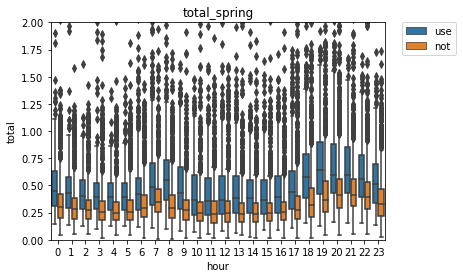

In [29]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

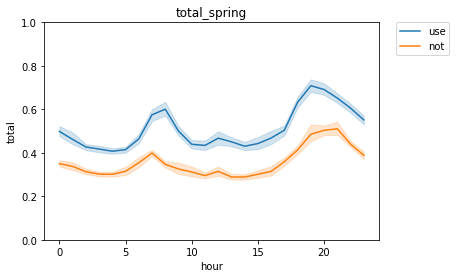

In [30]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

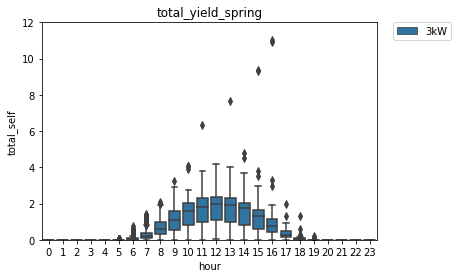

In [31]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

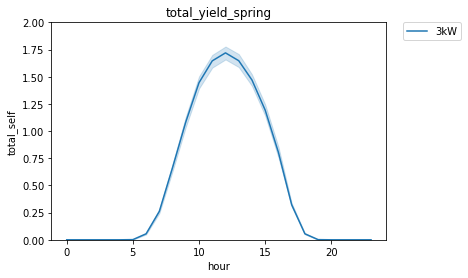

In [32]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

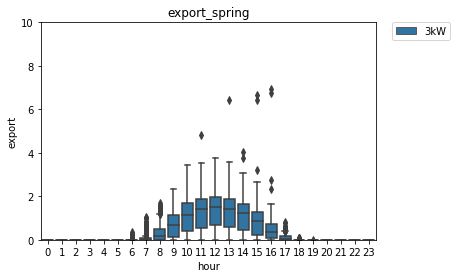

In [33]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

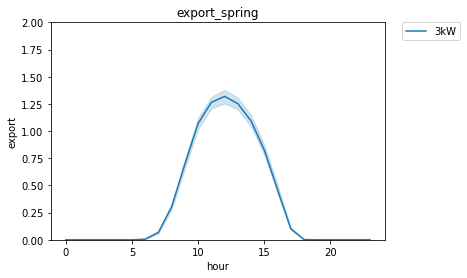

In [34]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

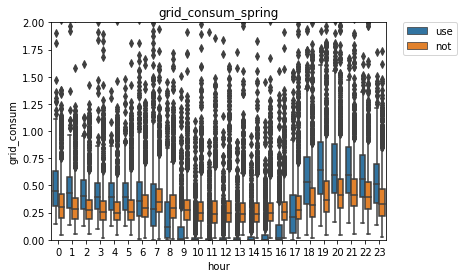

In [35]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

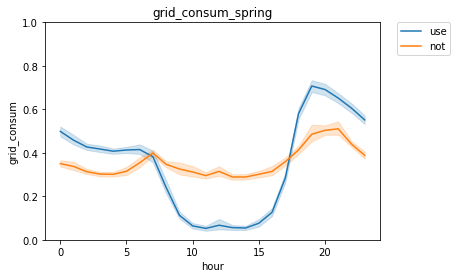

In [36]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

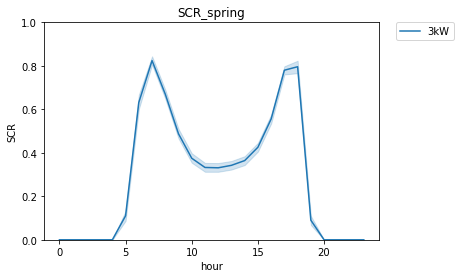

In [37]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_spring')
plt.show()

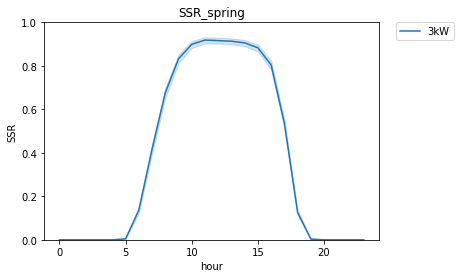

In [38]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_spring')
plt.show()

<hr>

### 여름(Summer)

In [39]:
df_all_hour_summer = df_all_hour[(df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') | (df_all_hour.ym == '2021/8')]

In [40]:
# 총 전력 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1551.0  0.436137  0.462807  0.049988  0.220032  0.339966  0.550049   
     1   1559.0  0.386314  0.279552  0.049988  0.200012  0.309937  0.500000   
     2   1553.0  0.347072  0.226169  0.059998  0.190002  0.289917  0.440186   
     3   1552.0  0.326284  0.230813  0.059998  0.179993  0.270020  0.409973   
     4   1557.0  0.304490  0.195845  0.059998  0.169983  0.259949  0.369995   
     5   1542.0  0.300797  0.221379  0.049988  0.169983  0.250000  0.369995   
     6   1539.0  0.384170  1.393346  0.049988  0.190063  0.290039  0.420044   
     7   1537.0  0.430787  0.448600  0.059998  0.250000  0.359985  0.489990   
     8   1542.0  0.388820  0.333348  0.049988  0.210022  0.320068  0.460022   
     9   1543.0  0.371800  0.312081  0.040039  0.200012  0.309998  0.440125   
     10  1541.0  0.406775  1.128464  0.049988  0.200012  0.309998  0.449951   
     11  1551.0  0.448530  1.567014  0.049988  0.179993  0.299988  0.449951   
     12  1538.0  0.395807  0.418532  0.039978  0.179993  0.300049  0.460083   
     13  1546.0  0.415501  0.600920  0.039978  0.179993  0.300049  0.469971   
     14  1545.0  0.443118  1.113807  0.039978  0.190002  0.300049  0.459961   
     15  1541.0  0.409494  0.420008  0.049988  0.200012  0.309998  0.459961   
     16  1541.0  0.445885  0.703194  0.039978  0.200073  0.329956  0.489990   
     17  1542.0  0.472776  0.536444  0.059998  0.210022  0.339966  0.539978   
     18  1537.0  0.535511  0.591967  0.049988  0.220032  0.359985  0.619995   
     19  1547.0  0.568424  0.593621  0.059998  0.250000  0.409973  0.660034   
     20  1542.0  0.634293  0.614585  0.059998  0.319946  0.460083  0.739990   
     21  1551.0  0.623419  0.598691  0.059998  0.339966  0.479980  0.720093   
     22  1553.0  0.546162  0.427432  0.070007  0.290039  0.429993  0.670044   
     23  1543.0  0.469696  0.356369  0.059998  0.245056  0.360046  0.595032   
use  0    719.0  0.525786  0.324318  0.159973  0.290039  0.430054  0.660095   
     1    722.0  0.490083  0.311531  0.139984  0.270020  0.409973  0.609985   
     2    721.0  0.431287  0.219780  0.140015  0.259949  0.380005  0.559937   
     3    721.0  0.414564  0.222955  0.140015  0.240051  0.350037  0.549927   
     4    713.0  0.395910  0.198321  0.139984  0.230011  0.339966  0.540039   
     5    706.0  0.408922  0.220954  0.140015  0.239990  0.340027  0.530029   
     6    706.0  0.456744  0.377321  0.129944  0.259895  0.364990  0.587311   
     7    705.0  0.538318  0.491275  0.169952  0.299988  0.429993  0.670044   
     8    710.0  0.601797  0.545127  0.150024  0.350128  0.480103  0.700096   
     9    707.0  0.554486  0.431766  0.110107  0.319824  0.459961  0.670029   
     10   715.0  0.528004  0.379535  0.129944  0.275009  0.440063  0.639938   
     11   710.0  0.590769  0.580635  0.110046  0.280029  0.460068  0.707504   
     12   708.0  0.641619  0.521053  0.109985  0.297470  0.500031  0.779976   
     13   707.0  0.656531  0.545545  0.119934  0.320068  0.500000  0.755066   
     14   709.0  0.642463  0.561913  0.130005  0.290039  0.480042  0.710022   
     15   710.0  0.658321  0.749030  0.120026  0.300049  0.479980  0.749939   
     16   717.0  0.644493  0.538677  0.119873  0.309937  0.489929  0.740051   
     17   717.0  0.697749  0.511479  0.149872  0.369995  0.529907  0.879883   
     18   714.0  0.783024  0.545761  0.160004  0.390015  0.599869  1.017426   
     19   718.0  0.861349  0.623816  0.129944  0.432487  0.639984  1.099976   
     20   718.0  0.827754  0.533436  0.169983  0.459999  0.670013  1.047455   
     21   721.0  0.778439  0.445953  0.169983  0.469971  0.660034  0.979980   
     22   717.0  0.723550  0.454093  0.179993  0.430054  0.609985  0.880005   
     23   715.0  0.613494  0.391605  0.140015  0.359985  0.520020  0.739990   

               max  
type 시간             
not  0   10.59997

In [41]:
# 총 전력 생산량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   706.0  0.005469  0.017677  0.0  0.000000  0.000000  0.010010   
         6   706.0  0.094219  0.093289  0.0  0.030029  0.069946  0.130005   
         7   705.0  0.325845  0.236465  0.0  0.150024  0.300049  0.440063   
         8   710.0  0.658331  0.412814  0.0  0.349976  0.599976  0.937500   
         9   707.0  1.006877  0.568302  0.0  0.570068  0.969971  1.460083   
         10  715.0  1.253565  0.638758  0.0  0.760010  1.339966  1.764954   
         11  710.0  1.394491  0.666149  0.0  0.892517  1.524963  1.950043   
         12  708.0  1.467595  0.763507  0.0  0.947479  1.559998  2.000000   
         13  707.0  1.429270  0.740757  0.0  0.929993  1.540039  1.920044   
         14  709.0  1.306509  0.805676  0.0  0.789917  1.410034  1.779907   
         15  710.0  1.074225  0.736696  0.0  0.630005  1.139893  1.460052   
         16  717.0  0.741194  0.510193  0.0  0.419922  0.729980  1.020020   
         17  717.0  0.394804  0.421663  0.0  0.209961  0.350098  0.540039   
         18  714.0  0.118340  0.111015  0.0  0.049805  0.110107  0.169922   
         19  718.0  0.010661  0.031409  0.0  0.000000  0.000000  0.010010   
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.391602  
         6    0.760010  
         7    1.309937  
         8    1.940063  
         9    3.270020  
         10   3.660034  
         11   4.231323  
         12   8.669922  
         13   9.620117  
         14  11.100037  
         15  11.300049  
         16   8.569946  
         17   9.150024  
         18   1.599243  
         19   0.704712  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [42]:
# 총 전력 수출량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   706.0  0.000014  0.000377  0.0  0.000000  0.000000  0.000000   
         6   706.0  0.008459  0.030278  0.0  0.000000  0.000000  0.000000   
         7   705.0  0.087184  0.143965  0.0  0.000000  0.020020  0.119995   
         8   710.0  0.294368  0.324199  0.0  0.010010  0.209961  0.450012   
         9   707.0  0.593177  0.503148  0.0  0.125000  0.510010  0.949982   
         10  715.0  0.820579  0.598039  0.0  0.280029  0.780029  1.300049   
         11  710.0  0.916450  0.629779  0.0  0.352501  0.889954  1.420029   
         12  708.0  0.955398  0.697732  0.0  0.399986  0.919952  1.492584   
         13  707.0  0.909399  0.672949  0.0  0.340057  0.880005  1.400024   
         14  709.0  0.808089  0.696296  0.0  0.270020  0.729980  1.290039   
         15  710.0  0.601094  0.589765  0.0  0.130005  0.520020  0.979980   
         16  717.0  0.333568  0.358753  0.0  0.040039  0.229980  0.520020   
         17  717.0  0.099918  0.268459  0.0  0.000000  0.020020  0.130005   
         18  714.0  0.004523  0.021067  0.0  0.000000  0.000000  0.000000   
         19  718.0  0.000237  0.004586  0.0  0.000000  0.000000  0.000000   
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.010010  
         6   0.400024  
         7   0.890015  
         8   1.589966  
         9   2.109985  
         10  3.140015  
         11  2.300049  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  8.160034  
         16  3.589966  
         17  6.169922  
         18  0.429932  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [43]:
# 총 그리드 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1551.0  0.436137  0.462807  0.049988  0.220032  0.339966  0.550049   
     1   1559.0  0.386314  0.279552  0.049988  0.200012  0.309937  0.500000   
     2   1553.0  0.347072  0.226169  0.059998  0.190002  0.289917  0.440186   
     3   1552.0  0.326284  0.230813  0.059998  0.179993  0.270020  0.409973   
     4   1557.0  0.304490  0.195845  0.059998  0.169983  0.259949  0.369995   
     5   1542.0  0.300797  0.221379  0.049988  0.169983  0.250000  0.369995   
     6   1539.0  0.384170  1.393346  0.049988  0.190063  0.290039  0.420044   
     7   1537.0  0.430787  0.448600  0.059998  0.250000  0.359985  0.489990   
     8   1542.0  0.388820  0.333348  0.049988  0.210022  0.320068  0.460022   
     9   1543.0  0.371800  0.312081  0.040039  0.200012  0.309998  0.440125   
     10  1541.0  0.406775  1.128464  0.049988  0.200012  0.309998  0.449951   
     11  1551.0  0.448530  1.567014  0.049988  0.179993  0.299988  0.449951   
     12  1538.0  0.395807  0.418532  0.039978  0.179993  0.300049  0.460083   
     13  1546.0  0.415501  0.600920  0.039978  0.179993  0.300049  0.469971   
     14  1545.0  0.443118  1.113807  0.039978  0.190002  0.300049  0.459961   
     15  1541.0  0.409494  0.420008  0.049988  0.200012  0.309998  0.459961   
     16  1541.0  0.445885  0.703194  0.039978  0.200073  0.329956  0.489990   
     17  1542.0  0.472776  0.536444  0.059998  0.210022  0.339966  0.539978   
     18  1537.0  0.535511  0.591967  0.049988  0.220032  0.359985  0.619995   
     19  1547.0  0.568424  0.593621  0.059998  0.250000  0.409973  0.660034   
     20  1542.0  0.634293  0.614585  0.059998  0.319946  0.460083  0.739990   
     21  1551.0  0.623419  0.598691  0.059998  0.339966  0.479980  0.720093   
     22  1553.0  0.546162  0.427432  0.070007  0.290039  0.429993  0.670044   
     23  1543.0  0.469696  0.356369  0.059998  0.245056  0.360046  0.595032   
use  0    719.0  0.526274  0.324904  0.159973  0.290039  0.430054  0.660095   
     1    722.0  0.490251  0.311577  0.139984  0.270020  0.409973  0.610077   
     2    721.0  0.431381  0.219816  0.140015  0.259949  0.380005  0.559937   
     3    721.0  0.414564  0.222955  0.140015  0.240051  0.350037  0.549927   
     4    713.0  0.395910  0.198321  0.139984  0.230011  0.339966  0.540039   
     5    706.0  0.403468  0.220053  0.130005  0.239990  0.339966  0.530029   
     6    706.0  0.370984  0.384249  0.010010  0.180054  0.269958  0.500000   
     7    705.0  0.299657  0.487939  0.000000  0.059998  0.199951  0.409912   
     8    710.0  0.237835  0.514075  0.000000  0.010010  0.080078  0.317474   
     9    707.0  0.140787  0.320651  0.000000  0.000000  0.020020  0.150024   
     10   715.0  0.095018  0.227992  0.000000  0.000000  0.000000  0.069977   
     11   710.0  0.112729  0.390884  0.000000  0.000000  0.000000  0.070000   
     12   708.0  0.129422  0.303912  0.000000  0.000000  0.000000  0.090027   
     13   707.0  0.136660  0.306117  0.000000  0.000000  0.010010  0.119995   
     14   709.0  0.144042  0.314631  0.000000  0.000000  0.010010  0.140015   
     15   710.0  0.185190  0.457982  0.000000  0.000000  0.020020  0.217529   
     16   717.0  0.236866  0.393221  0.000000  0.000000  0.059998  0.309998   
     17   717.0  0.402864  0.460098  0.000000  0.080078  0.239990  0.570007   
     18   714.0  0.669207  0.545183  0.029968  0.280029  0.485016  0.890015   
     19   718.0  0.850926  0.624303  0.129944  0.420044  0.630005  1.087494   
     20   718.0  0.827923  0.533356  0.169983  0.459999  0.670013  1.047455   
     21   721.0  0.779657  0.446841  0.169983  0.469971  0.660034  0.989990   
     22   717.0  0.723017  0.447580  0.179993  0.430054  0.609985  0.880005   
     23   715.0  0.614927  0.398245  0.140015  0.359985  0.520020  0.739990   

               max  
type 시간             
not  0   10.59997

In [44]:
# SCR(자가소비율)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   706.0  0.298630  0.457766  0.0  0.000000  0.000000  1.000000  1.0
         6   706.0  0.842449  0.328805  0.0  0.899878  1.000000  1.000000  1.0
         7   705.0  0.786551  0.259952  0.0  0.657886  0.876524  1.000000  1.0
         8   710.0  0.654107  0.278897  0.0  0.426679  0.660538  0.942338  1.0
         9   707.0  0.513415  0.296570  0.0  0.257562  0.447687  0.772353  1.0
         10  715.0  0.435210  0.286627  0.0  0.197656  0.339163  0.650010  1.0
         11  710.0  0.420521  0.279843  0.0  0.189056  0.335125  0.615154  1.0
         12  708.0  0.422796  0.275612  0.0  0.206863  0.342120  0.594045  1.0
         13  707.0  0.433601  0.274969  0.0  0.207500  0.360348  0.625637  1.0
         14  709.0  0.463562  0.287035  0.0  0.217804  0.392213  0.687488  1.0
         15  710.0  0.528545  0.294498  0.0  0.273904  0.482842  0.795426  1.0
         16  717.0  0.632031  0.281129  0.0  0.399897  0.656369  0.891322  1.0
         17  717.0  0.816140  0.234319  0.0  0.694134  0.919922  1.000000  1.0
         18  714.0  0.910673  0.258309  0.0  1.000000  1.000000  1.000000  1.0
         19  718.0  0.457914  0.498045  0.0  0.000000  0.000000  1.000000  1.0
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [45]:
# SSR(자가공급률)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   719.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   706.0  0.014464  0.032152  0.0  0.000000  0.000000  0.017184   
         6   706.0  0.235508  0.219309  0.0  0.058026  0.166780  0.358798   
         7   705.0  0.536388  0.307348  0.0  0.274947  0.568933  0.810953   
         8   710.0  0.706927  0.303547  0.0  0.500068  0.817622  0.975587   
         9   707.0  0.818700  0.269645  0.0  0.729146  0.956476  1.000000   
         10  715.0  0.875683  0.234881  0.0  0.879944  1.000000  1.000000   
         11  710.0  0.886170  0.219766  0.0  0.889587  1.000000  1.000000   
         12  708.0  0.876537  0.222570  0.0  0.852504  1.000000  1.000000   
         13  707.0  0.871044  0.221337  0.0  0.832487  0.984833  1.000000   
         14  709.0  0.856495  0.239503  0.0  0.797833  0.980750  1.000000   
         15  710.0  0.816919  0.259698  0.0  0.717847  0.959959  1.000000   
         16  717.0  0.740668  0.290215  0.0  0.572493  0.860488  1.000000   
         17  717.0  0.533205  0.297868  0.0  0.278480  0.531235  0.783770   
         18  714.0  0.207672  0.191394  0.0  0.064658  0.149655  0.308985   
         19  718.0  0.018220  0.037992  0.0  0.000000  0.000000  0.020638   
         20  718.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  721.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  717.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.947318  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.903533  
         19  0.501673  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

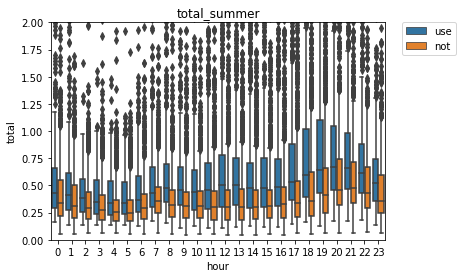

In [46]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

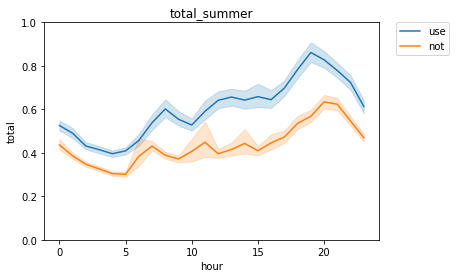

In [47]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

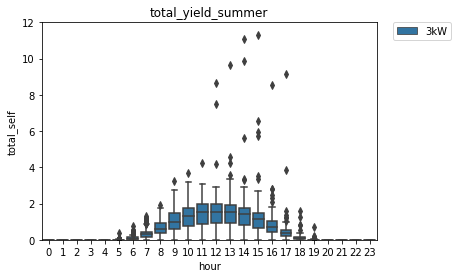

In [48]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

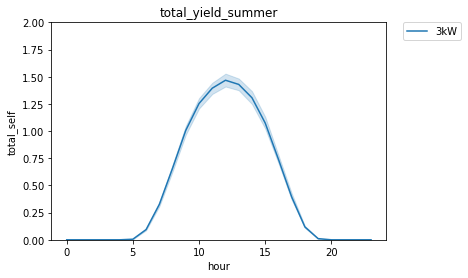

In [49]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

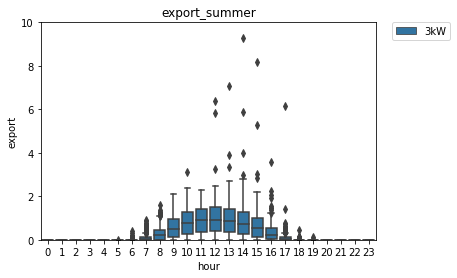

In [50]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

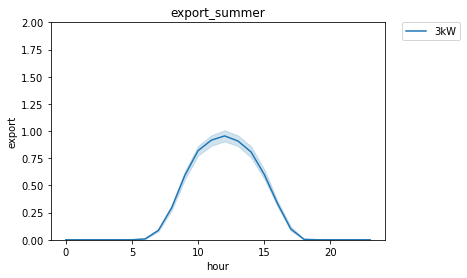

In [51]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

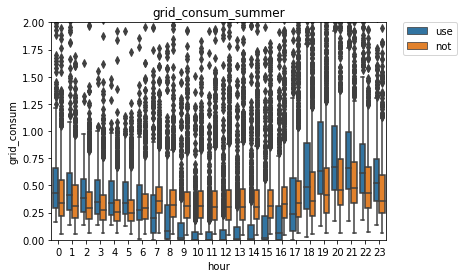

In [52]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

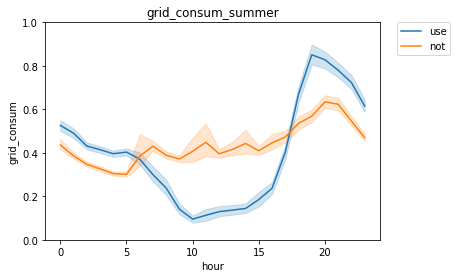

In [53]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

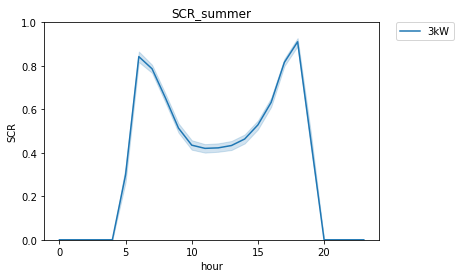

In [54]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_summer')
plt.show()

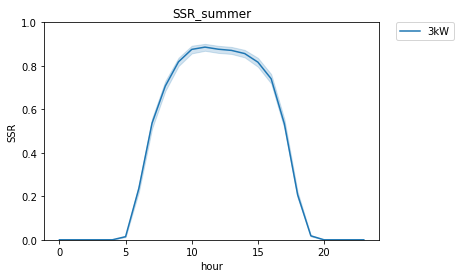

In [55]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_summer')
plt.show()

<hr>

### 가을(Autumn)

In [56]:
df_all_hour_autumn = df_all_hour[(df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') | (df_all_hour.ym == '2021/11')]

In [57]:
# 총 전력 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1565.0  0.370618  0.389730  0.029968  0.219971  0.309937  0.429932   
     1   1569.0  0.337969  0.234600  0.039978  0.200073  0.289917  0.380127   
     2   1565.0  0.317384  0.198719  0.030029  0.190063  0.280029  0.369995   
     3   1570.0  0.313470  0.233663  0.039978  0.189941  0.270020  0.359863   
     4   1563.0  0.297703  0.193605  0.030029  0.179932  0.260010  0.359863   
     5   1563.0  0.302342  0.296832  0.030029  0.170044  0.250000  0.359863   
     6   1560.0  0.330779  0.281238  0.029968  0.190155  0.274902  0.390015   
     7   1555.0  0.403929  0.488423  0.020020  0.239990  0.330078  0.459961   
     8   1569.0  0.362788  0.392574  0.019958  0.209961  0.300049  0.429932   
     9   1560.0  0.325581  0.341599  0.019958  0.180054  0.280029  0.389893   
     10  1565.0  0.304720  0.339423  0.029968  0.179932  0.260010  0.350098   
     11  1544.0  0.301683  0.305591  0.030029  0.160034  0.250000  0.350006   
     12  1551.0  0.323012  0.281235  0.020020  0.160034  0.260010  0.379883   
     13  1550.0  0.344482  1.048714  0.020020  0.160034  0.250000  0.379883   
     14  1547.0  0.345013  0.979952  0.019958  0.169922  0.260010  0.364990   
     15  1547.0  0.343959  0.542472  0.019958  0.170013  0.270020  0.369995   
     16  1552.0  0.351359  0.375128  0.020020  0.180145  0.280029  0.400024   
     17  1556.0  0.390506  0.437529  0.029968  0.190063  0.309967  0.449951   
     18  1550.0  0.466479  0.421107  0.030029  0.229980  0.359863  0.550018   
     19  1554.0  0.527747  0.512769  0.019958  0.270020  0.389893  0.590088   
     20  1547.0  0.497726  0.338225  0.049927  0.309937  0.420044  0.584961   
     21  1558.0  0.508834  0.370150  0.039978  0.319946  0.420044  0.580078   
     22  1563.0  0.466324  0.449527  0.020020  0.290039  0.380005  0.530029   
     23  1560.0  0.393740  0.248240  0.030029  0.239990  0.339844  0.470215   
use  0    714.0  0.528374  0.287001  0.149902  0.299942  0.465088  0.680115   
     1    711.0  0.484823  0.269099  0.139954  0.270020  0.429932  0.620117   
     2    715.0  0.448100  0.252168  0.140015  0.270020  0.410034  0.570068   
     3    706.0  0.423092  0.221317  0.130005  0.260010  0.389893  0.540039   
     4    710.0  0.415402  0.221706  0.140015  0.250000  0.385010  0.530029   
     5    710.0  0.417477  0.210857  0.130005  0.250000  0.394958  0.530029   
     6    708.0  0.470854  0.328262  0.140015  0.250000  0.410034  0.580078   
     7    708.0  0.565456  0.434049  0.139893  0.320068  0.460083  0.669922   
     8    709.0  0.589000  0.313590  0.120117  0.349976  0.519775  0.739990   
     9    718.0  0.510927  0.326056  0.099976  0.270020  0.430176  0.670044   
     10   716.0  0.469294  0.296809  0.079956  0.239990  0.389954  0.630035   
     11   709.0  0.473433  0.354499  0.079956  0.239990  0.380005  0.619751   
     12   706.0  0.516637  0.377863  0.109985  0.260040  0.410217  0.667480   
     13   708.0  0.500679  0.316518  0.080078  0.269867  0.449829  0.640091   
     14   715.0  0.487483  0.338210  0.080200  0.250122  0.419922  0.600098   
     15   714.0  0.468838  0.301563  0.089966  0.250122  0.409912  0.589966   
     16   718.0  0.499821  0.444352  0.109985  0.270035  0.424927  0.619873   
     17   714.0  0.596315  0.524348  0.109985  0.330078  0.509918  0.730072   
     18   711.0  0.699217  0.371412  0.189941  0.430054  0.630005  0.860046   
     19   710.0  0.727135  0.399228  0.219971  0.420044  0.625000  0.900116   
     20   712.0  0.704741  0.426881  0.200012  0.420044  0.590088  0.879944   
     21   706.0  0.691194  0.383113  0.200012  0.412506  0.589966  0.880096   
     22   713.0  0.677192  0.430908  0.169983  0.399902  0.560059  0.860107   
     23   713.0  0.600208  0.352408  0.140015  0.334961  0.529907  0.760010   

               max  
type 시간             
not  0   12.57006

In [58]:
# 총 전력 생산량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.000014  0.000376  0.000000  0.000000  0.000000   
         6   708.0  0.007246  0.020787  0.000000  0.000000  0.000000   
         7   708.0  0.136364  0.146288  0.000000  0.040039  0.099854   
         8   709.0  0.516817  0.342955  0.000000  0.260010  0.469971   
         9   718.0  0.979558  0.546083  0.000000  0.520020  1.010010   
         10  716.0  1.297916  0.625721  0.000000  0.797363  1.414917   
         11  709.0  1.459050  0.691698  0.019897  0.880127  1.640137   
         12  706.0  1.498552  0.737933  0.010010  0.869934  1.704956   
         13  708.0  1.390943  0.729340  0.010010  0.750000  1.489990   
         14  715.0  1.185248  0.756828  0.000000  0.610107  1.220215   
         15  714.0  0.793063  0.500280  0.000000  0.362549  0.780029   
         16  718.0  0.387909  0.429267  0.000000  0.120026  0.269897   
         17  714.0  0.106617  0.514571  0.000000  0.000000  0.020020   
         18  711.0  0.003544  0.013409  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.010010  
         6   0.010010   0.270020  
         7   0.189941   1.129883  
         8   0.730225   1.879883  
         9   1.419922   2.510010  
         10  1.822510   3.020020  
         11  2.030029   2.969971  
         12  2.080078   4.650146  
         13  1.949982   6.669922  
         14  1.665039  10.650146  
         15  1.169922   3.140137  
         16  0.550049   7.390137  
         17  0.110107  12.609985  
         18  0.000000   0.260010  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [59]:
# 총 전력 수출량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   714.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   708.0  0.000268  0.003413  0.0  0.000000  0.000000  0.000000   
         7   708.0  0.018921  0.065073  0.0  0.000000  0.000000  0.010010   
         8   709.0  0.196457  0.241656  0.0  0.009766  0.109985  0.299927   
         9   718.0  0.600190  0.477377  0.0  0.140137  0.550049  0.950043   
         10  716.0  0.907773  0.585638  0.0  0.360077  0.979980  1.369995   
         11  709.0  1.063587  0.657861  0.0  0.469971  1.189941  1.580078   
         12  706.0  1.069111  0.690862  0.0  0.420044  1.169952  1.609985   
         13  708.0  0.975209  0.677833  0.0  0.327393  1.040039  1.510010   
         14  715.0  0.795298  0.681875  0.0  0.244995  0.760010  1.244995   
         15  714.0  0.463689  0.446656  0.0  0.050049  0.340027  0.819946   
         16  718.0  0.163150  0.266829  0.0  0.000000  0.030029  0.250000   
         17  714.0  0.026586  0.230079  0.0  0.000000  0.000000  0.000000   
         18  711.0  0.000056  0.001502  0.0  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.750000  
         8   1.419922  
         9   1.949951  
         10  2.419922  
         11  2.310059  
         12  3.500000  
         13  5.699951  
         14  9.149902  
         15  2.630493  
         16  2.790039  
         17  4.760010  
         18  0.040039  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [60]:
# 총 그리드 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1565.0  0.370618  0.389730  0.029968  0.219971  0.309937  0.429932   
     1   1569.0  0.337969  0.234600  0.039978  0.200073  0.289917  0.380127   
     2   1565.0  0.317384  0.198719  0.030029  0.190063  0.280029  0.369995   
     3   1570.0  0.313470  0.233663  0.039978  0.189941  0.270020  0.359863   
     4   1563.0  0.297703  0.193605  0.030029  0.179932  0.260010  0.359863   
     5   1563.0  0.302342  0.296832  0.030029  0.170044  0.250000  0.359863   
     6   1560.0  0.330779  0.281238  0.029968  0.190155  0.274902  0.390015   
     7   1555.0  0.403929  0.488423  0.020020  0.239990  0.330078  0.459961   
     8   1569.0  0.362788  0.392574  0.019958  0.209961  0.300049  0.429932   
     9   1560.0  0.325581  0.341599  0.019958  0.180054  0.280029  0.389893   
     10  1565.0  0.304720  0.339423  0.029968  0.179932  0.260010  0.350098   
     11  1544.0  0.301683  0.305591  0.030029  0.160034  0.250000  0.350006   
     12  1551.0  0.323012  0.281235  0.020020  0.160034  0.260010  0.379883   
     13  1550.0  0.344482  1.048714  0.020020  0.160034  0.250000  0.379883   
     14  1547.0  0.345013  0.979952  0.019958  0.169922  0.260010  0.364990   
     15  1547.0  0.343959  0.542472  0.019958  0.170013  0.270020  0.369995   
     16  1552.0  0.351359  0.375128  0.020020  0.180145  0.280029  0.400024   
     17  1556.0  0.390506  0.437529  0.029968  0.190063  0.309967  0.449951   
     18  1550.0  0.466479  0.421107  0.030029  0.229980  0.359863  0.550018   
     19  1554.0  0.527747  0.512769  0.019958  0.270020  0.389893  0.590088   
     20  1547.0  0.497726  0.338225  0.049927  0.309937  0.420044  0.584961   
     21  1558.0  0.508834  0.370150  0.039978  0.319946  0.420044  0.580078   
     22  1563.0  0.466324  0.449527  0.020020  0.290039  0.380005  0.530029   
     23  1560.0  0.393740  0.248240  0.030029  0.239990  0.339844  0.470215   
use  0    714.0  0.528374  0.287001  0.149902  0.299942  0.465088  0.680115   
     1    711.0  0.484823  0.269099  0.139954  0.270020  0.429932  0.620117   
     2    715.0  0.448100  0.252168  0.140015  0.270020  0.410034  0.570068   
     3    706.0  0.423092  0.221317  0.130005  0.260010  0.389893  0.540039   
     4    710.0  0.415402  0.221706  0.140015  0.250000  0.385010  0.530029   
     5    710.0  0.417463  0.210831  0.130005  0.250000  0.394958  0.530029   
     6    708.0  0.463876  0.327911  0.140015  0.250000  0.400024  0.570068   
     7    708.0  0.448013  0.441477  0.000000  0.199951  0.349915  0.552551   
     8    709.0  0.268640  0.300869  0.000000  0.040039  0.170044  0.400024   
     9    718.0  0.131559  0.253919  0.000000  0.000000  0.010010  0.149902   
     10   716.0  0.079150  0.189402  0.000000  0.000000  0.000000  0.042480   
     11   709.0  0.077971  0.226264  0.000000  0.000000  0.000000  0.030029   
     12   706.0  0.087196  0.208159  0.000000  0.000000  0.000000  0.050049   
     13   708.0  0.084945  0.192704  0.000000  0.000000  0.000000  0.059845   
     14   715.0  0.097533  0.224505  0.000000  0.000000  0.009888  0.079956   
     15   714.0  0.139464  0.237723  0.000000  0.000000  0.030029  0.187500   
     16   718.0  0.275063  0.335340  0.000000  0.049927  0.170044  0.410095   
     17   714.0  0.516284  0.366676  0.010010  0.250000  0.440002  0.689941   
     18   711.0  0.695732  0.372164  0.189941  0.429962  0.620117  0.859985   
     19   710.0  0.727138  0.399226  0.219971  0.420044  0.625000  0.900116   
     20   712.0  0.704744  0.426879  0.200012  0.420044  0.590088  0.879944   
     21   706.0  0.691197  0.383111  0.200012  0.412506  0.589966  0.880096   
     22   713.0  0.677195  0.430906  0.169983  0.399902  0.560059  0.860107   
     23   713.0  0.600211  0.352407  0.140015  0.334961  0.529907  0.760010   

               max  
type 시간             
not  0   12.57006

In [61]:
# SCR(자가소비율)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.001408  0.037529  0.000000  0.000000  0.000000   
         6   708.0  0.282421  0.449168  0.000000  0.000000  0.000000   
         7   708.0  0.855686  0.285860  0.000000  0.857008  1.000000   
         8   709.0  0.707109  0.262305  0.000000  0.500185  0.743505   
         9   718.0  0.494782  0.292658  0.000000  0.246023  0.428573   
         10  716.0  0.398418  0.280985  0.000000  0.174827  0.312297   
         11  709.0  0.368724  0.279953  0.044140  0.150743  0.269702   
         12  706.0  0.384600  0.280079  0.017993  0.161574  0.286649   
         13  708.0  0.405208  0.282888  0.045759  0.178491  0.312452   
         14  715.0  0.445452  0.287480  0.000000  0.200015  0.379598   
         15  714.0  0.556074  0.300980  0.000000  0.296092  0.521762   
         16  718.0  0.736535  0.284139  0.000000  0.515185  0.846106   
         17  714.0  0.670624  0.439481  0.000000  0.000000  1.000000   
         18  711.0  0.147463  0.354558  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.962466  1.0  
         9   0.727386  1.0  
         10  0.540485  1.0  
         11  0.500000  1.0  
         12  0.529459  1.0  
         13  0.562015  1.0  
         14  0.623785  1.0  
         15  0.846222  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [62]:
# SSR(자가공급률)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.000017  0.000464  0.000000  0.000000  0.000000   
         6   708.0  0.017862  0.045246  0.000000  0.000000  0.000000   
         7   708.0  0.265499  0.237499  0.000000  0.068377  0.194689   
         8   709.0  0.620077  0.301486  0.000000  0.386766  0.666562   
         9   718.0  0.821925  0.273468  0.000000  0.749946  0.968478   
         10  716.0  0.889438  0.226745  0.000000  0.917645  1.000000   
         11  709.0  0.900286  0.213654  0.018380  0.934158  1.000000   
         12  706.0  0.893841  0.209467  0.014298  0.904903  1.000000   
         13  708.0  0.885170  0.215458  0.012206  0.878942  1.000000   
         14  715.0  0.864679  0.233074  0.000000  0.844503  0.988083   
         15  714.0  0.783095  0.271470  0.000000  0.643855  0.913988   
         16  718.0  0.540942  0.324435  0.000000  0.232221  0.569480   
         17  714.0  0.159144  0.221499  0.000000  0.000000  0.048425   
         18  711.0  0.006911  0.022455  0.000000  0.000000  0.000000   
         19  710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  712.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  713.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.012357  
         6   0.018536  0.500000  
         7   0.420969  1.000000  
         8   0.896465  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.853173  1.000000  
         17  0.218584  0.961502  
         18  0.000000  0.209511  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

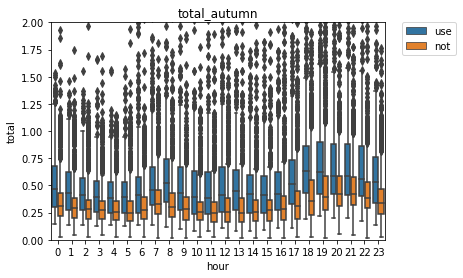

In [63]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

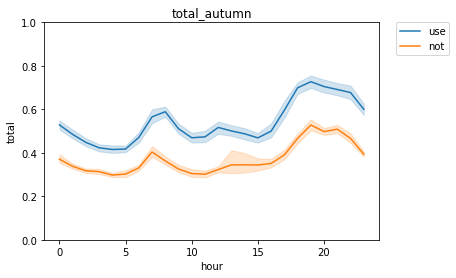

In [64]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

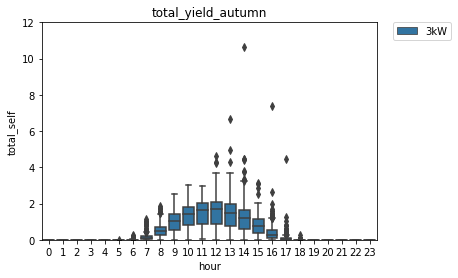

In [65]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

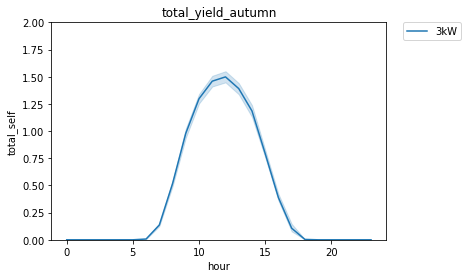

In [66]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

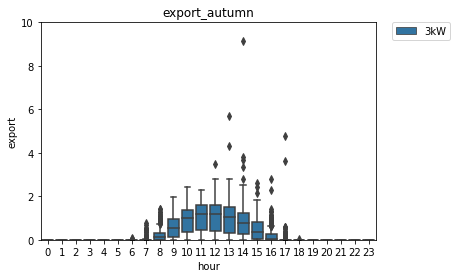

In [67]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

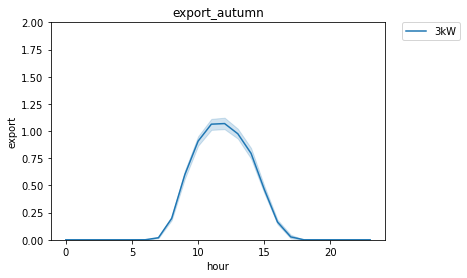

In [68]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

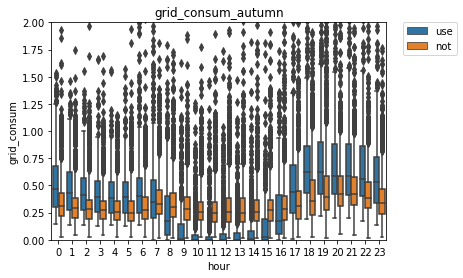

In [69]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

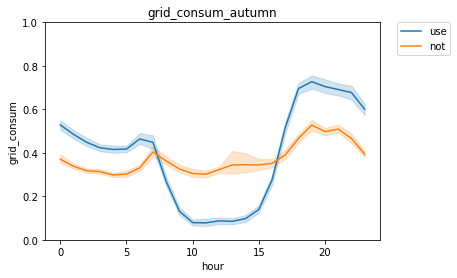

In [70]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

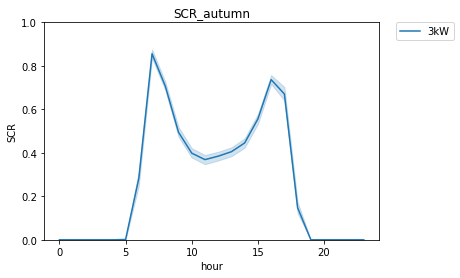

In [71]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_autumn')
plt.show()

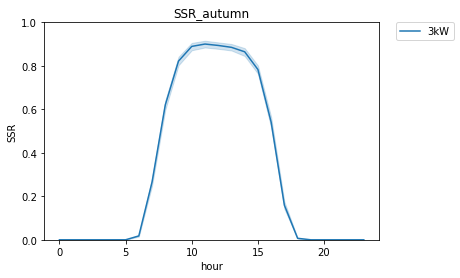

In [72]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_autumn')
plt.show()

<hr>

### 겨울(Winter)

In [73]:
df_all_hour_winter = df_all_hour[(df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') | (df_all_hour.ym == '2022/2')]

In [74]:
# 총 전력 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['전력소비량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1561.0  0.412357  0.302099  0.019897  0.239990  0.359985  0.479980   
     1   1562.0  0.380123  0.285047  0.019897  0.222656  0.339844  0.440186   
     2   1562.0  0.368259  0.257673  0.040039  0.219971  0.320068  0.420166   
     3   1566.0  0.357912  0.221075  0.020020  0.210205  0.320068  0.420349   
     4   1565.0  0.358999  0.299992  0.020020  0.209961  0.310059  0.419922   
     5   1550.0  0.359120  0.351973  0.029907  0.199951  0.310059  0.420349   
     6   1561.0  0.387615  0.337888  0.020020  0.219971  0.330078  0.459961   
     7   1558.0  0.455169  0.414208  0.010010  0.280029  0.399902  0.539795   
     8   1558.0  0.435029  0.530737  0.019958  0.239990  0.350098  0.500000   
     9   1561.0  0.407476  0.580480  0.020020  0.209961  0.319946  0.450195   
     10  1569.0  0.397730  0.660159  0.010010  0.199951  0.290039  0.429932   
     11  1571.0  0.365813  0.443220  0.020020  0.179932  0.280029  0.410156   
     12  1562.0  0.366828  0.408297  0.010010  0.179932  0.280029  0.439941   
     13  1558.0  0.412559  2.170503  0.010010  0.179932  0.280029  0.430176   
     14  1559.0  0.372126  0.481104  0.019897  0.179932  0.280029  0.429932   
     15  1564.0  0.368486  0.583402  0.020020  0.189941  0.290039  0.419922   
     16  1567.0  0.411146  0.555799  0.019958  0.199951  0.310059  0.459961   
     17  1563.0  0.477813  0.479392  0.019897  0.229980  0.359985  0.549805   
     18  1542.0  0.558204  0.507364  0.019897  0.270020  0.419922  0.630371   
     19  1558.0  0.605640  0.726485  0.030029  0.310059  0.449951  0.639893   
     20  1554.0  0.574894  0.534990  0.020020  0.339966  0.469971  0.639893   
     21  1546.0  0.570580  0.539691  0.049927  0.349976  0.479980  0.639893   
     22  1563.0  0.515591  0.382215  0.020020  0.310059  0.449951  0.610107   
     23  1566.0  0.456047  0.512156  0.020020  0.270020  0.389893  0.529785   
use  0    706.0  0.615421  0.266692  0.140015  0.410156  0.599854  0.790039   
     1    708.0  0.562597  0.312628  0.150024  0.379974  0.539917  0.700012   
     2    710.0  0.528477  0.220120  0.140015  0.360016  0.489990  0.659912   
     3    709.0  0.502522  0.201084  0.160400  0.359863  0.469971  0.609863   
     4    710.0  0.511935  0.270470  0.139893  0.359985  0.479980  0.629883   
     5    711.0  0.501260  0.226451  0.119995  0.340088  0.469971  0.619873   
     6    701.0  0.551383  0.310362  0.099976  0.350098  0.489990  0.669922   
     7    699.0  0.674693  0.679160  0.159912  0.391724  0.540039  0.820068   
     8    705.0  0.755685  0.396578  0.159790  0.469971  0.679932  0.950195   
     9    703.0  0.731926  0.492126  0.089844  0.429749  0.669922  0.955017   
     10   698.0  0.665498  0.628297  0.079834  0.319824  0.590088  0.859711   
     11   698.0  0.618879  0.460344  0.090088  0.290070  0.559814  0.820160   
     12   700.0  0.618468  0.414396  0.079834  0.320160  0.549927  0.829742   
     13   699.0  0.605022  0.374820  0.079834  0.330078  0.539917  0.820068   
     14   695.0  0.590137  0.367532  0.080078  0.340088  0.539917  0.769897   
     15   705.0  0.579459  0.352175  0.070068  0.319824  0.520020  0.759766   
     16   707.0  0.621367  0.602254  0.089844  0.340088  0.540283  0.790039   
     17   704.0  0.742104  0.416225  0.119873  0.460175  0.669922  0.940186   
     18   705.0  0.871988  0.415417  0.199951  0.570068  0.800049  1.094971   
     19   705.0  0.895811  0.551083  0.140137  0.560059  0.800049  1.149902   
     20   706.0  0.836019  0.430333  0.149902  0.559814  0.759888  1.067383   
     21   698.0  0.799666  0.350208  0.200073  0.559814  0.750000  0.990173   
     22   705.0  0.749788  0.318426  0.164795  0.520020  0.709961  0.930176   
     23   704.0  0.696009  0.364672  0.160034  0.479980  0.660034  0.860107   

               max  
type 시간             
not  0    5.16992

In [75]:
# 총 전력 생산량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   701.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   699.0  0.012278  0.028332  0.000000  0.000000  0.000000   
         8   705.0  0.244928  0.201135  0.000000  0.100098  0.189941   
         9   703.0  0.801296  0.462691  0.000000  0.399902  0.770020   
         10  698.0  1.259270  0.589716  0.000000  0.819885  1.349976   
         11  698.0  1.573479  0.661937  0.000000  1.149902  1.765015   
         12  700.0  1.668440  0.675384  0.000000  1.217468  1.834961   
         13  699.0  1.581263  0.680279  0.019775  1.055054  1.790039   
         14  695.0  1.348187  0.724635  0.010010  0.819946  1.469971   
         15  705.0  0.927741  0.680345  0.000000  0.450195  0.880127   
         16  707.0  0.342937  0.433620  0.000000  0.080078  0.219971   
         17  704.0  0.057219  0.307765  0.000000  0.000000  0.010010   
         18  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.000000  
         6   0.000000   0.000000  
         7   0.010010   0.290039  
         8   0.339844   1.119873  
         9   1.164917   1.940186  
         10  1.729980   3.520020  
         11  2.030029   4.779785  
         12  2.170166   4.949951  
         13  2.119873   4.209961  
         14  1.830078   8.030029  
         15  1.320068  10.969971  
         16  0.479980   7.850098  
         17  0.050049   7.679932  
         18  0.000000   0.000000  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [76]:
# 총 전력 수출량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   711.0  0.000092  0.002454  0.0  0.000000  0.000000  0.000000   
         6   701.0  0.000093  0.002471  0.0  0.000000  0.000000  0.000000   
         7   699.0  0.000606  0.005910  0.0  0.000000  0.000000  0.000000   
         8   705.0  0.034848  0.076779  0.0  0.000000  0.000000  0.030029   
         9   703.0  0.341140  0.326593  0.0  0.060059  0.250000  0.540039   
         10  698.0  0.735122  0.501883  0.0  0.312531  0.724976  1.129974   
         11  698.0  1.039894  0.602242  0.0  0.595093  1.119934  1.489990   
         12  700.0  1.130585  0.632369  0.0  0.647400  1.239990  1.599915   
         13  699.0  1.054245  0.619011  0.0  0.529968  1.169922  1.529907   
         14  695.0  0.851429  0.626495  0.0  0.315002  0.880127  1.284973   
         15  705.0  0.513848  0.569330  0.0  0.099854  0.419922  0.839844   
         16  707.0  0.129278  0.236981  0.0  0.000000  0.019775  0.159912   
         17  704.0  0.014579  0.196648  0.0  0.000000  0.000000  0.000000   
         18  705.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  705.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.065430  
         6   0.065430  
         7   0.089844  
         8   0.620117  
         9   1.484863  
         10  3.010010  
         11  4.130127  
         12  4.089844  
         13  3.559814  
         14  6.680176  
         15  9.610107  
         16  2.250000  
         17  5.099976  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [77]:
# 총 그리드 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['수전전력량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1561.0  0.412357  0.302099  0.019897  0.239990  0.359985  0.479980   
     1   1562.0  0.380123  0.285047  0.019897  0.222656  0.339844  0.440186   
     2   1562.0  0.368259  0.257673  0.040039  0.219971  0.320068  0.420166   
     3   1566.0  0.357912  0.221075  0.020020  0.210205  0.320068  0.420349   
     4   1565.0  0.358999  0.299992  0.020020  0.209961  0.310059  0.419922   
     5   1550.0  0.359120  0.351973  0.029907  0.199951  0.310059  0.420349   
     6   1561.0  0.387615  0.337888  0.020020  0.219971  0.330078  0.459961   
     7   1558.0  0.455169  0.414208  0.010010  0.280029  0.399902  0.539795   
     8   1558.0  0.435029  0.530737  0.019958  0.239990  0.350098  0.500000   
     9   1561.0  0.407476  0.580480  0.020020  0.209961  0.319946  0.450195   
     10  1569.0  0.397730  0.660159  0.010010  0.199951  0.290039  0.429932   
     11  1571.0  0.365813  0.443220  0.020020  0.179932  0.280029  0.410156   
     12  1562.0  0.366828  0.408297  0.010010  0.179932  0.280029  0.439941   
     13  1558.0  0.412559  2.170503  0.010010  0.179932  0.280029  0.430176   
     14  1559.0  0.372126  0.481104  0.019897  0.179932  0.280029  0.429932   
     15  1564.0  0.368486  0.583402  0.020020  0.189941  0.290039  0.419922   
     16  1567.0  0.411146  0.555799  0.019958  0.199951  0.310059  0.459961   
     17  1563.0  0.477813  0.479392  0.019897  0.229980  0.359985  0.549805   
     18  1542.0  0.558204  0.507364  0.019897  0.270020  0.419922  0.630371   
     19  1558.0  0.605640  0.726485  0.030029  0.310059  0.449951  0.639893   
     20  1554.0  0.574894  0.534990  0.020020  0.339966  0.469971  0.639893   
     21  1546.0  0.570580  0.539691  0.049927  0.349976  0.479980  0.639893   
     22  1563.0  0.515591  0.382215  0.020020  0.310059  0.449951  0.610107   
     23  1566.0  0.456047  0.512156  0.020020  0.270020  0.389893  0.529785   
use  0    706.0  0.615513  0.266545  0.140015  0.410156  0.599854  0.790039   
     1    708.0  0.562689  0.312518  0.150024  0.379974  0.539917  0.700012   
     2    710.0  0.528569  0.219979  0.140015  0.360016  0.489990  0.659912   
     3    709.0  0.502614  0.200941  0.169922  0.359863  0.469971  0.609863   
     4    710.0  0.512027  0.270361  0.139893  0.359985  0.479980  0.629883   
     5    711.0  0.501352  0.226325  0.119995  0.340088  0.469971  0.619873   
     6    701.0  0.551476  0.310254  0.099976  0.350098  0.489990  0.669922   
     7    699.0  0.663021  0.679564  0.149902  0.380005  0.530029  0.810059   
     8    705.0  0.545605  0.405511  0.000000  0.250000  0.449951  0.740234   
     9    703.0  0.271771  0.439671  0.000000  0.020020  0.119873  0.359985   
     10   698.0  0.141351  0.483066  0.000000  0.000000  0.010010  0.119629   
     11   698.0  0.085294  0.222909  0.000000  0.000000  0.000000  0.040039   
     12   700.0  0.080613  0.209885  0.000000  0.000000  0.000000  0.040039   
     13   699.0  0.078004  0.180942  0.000000  0.000000  0.000000  0.059875   
     14   695.0  0.093379  0.204081  0.000000  0.000000  0.000000  0.080017   
     15   705.0  0.165566  0.268736  0.000000  0.000000  0.040039  0.229980   
     16   707.0  0.407707  0.467411  0.000000  0.090088  0.330078  0.589966   
     17   704.0  0.699464  0.412832  0.030029  0.410095  0.639893  0.910156   
     18   705.0  0.872009  0.415428  0.199951  0.570068  0.800049  1.094971   
     19   705.0  0.882429  0.416669  0.140137  0.560059  0.800049  1.140137   
     20   706.0  0.836030  0.430328  0.149902  0.559814  0.759888  1.067383   
     21   698.0  0.799551  0.350099  0.200073  0.559814  0.750000  0.990173   
     22   705.0  0.749841  0.318229  0.200195  0.520020  0.709961  0.930176   
     23   704.0  0.696102  0.364544  0.160034  0.479980  0.660034  0.860107   

               max  
type 시간             
not  0    5.16992

In [78]:
# SCR(자가소비율)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   701.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   699.0  0.433803  0.494089  0.000000  0.000000  0.000000   
         8   705.0  0.876372  0.222591  0.000000  0.835934  1.000000   
         9   703.0  0.648813  0.256510  0.000000  0.444466  0.654882   
         10  698.0  0.482405  0.268352  0.000000  0.267646  0.432278   
         11  698.0  0.399758  0.259039  0.000000  0.194789  0.348083   
         12  700.0  0.382166  0.248682  0.000000  0.188457  0.320099   
         13  699.0  0.399760  0.249193  0.035018  0.200950  0.348437   
         14  695.0  0.453723  0.263332  0.055723  0.244133  0.401679   
         15  705.0  0.563118  0.280639  0.000000  0.320503  0.546197   
         16  707.0  0.781127  0.268070  0.000000  0.620318  0.899919   
         17  704.0  0.538674  0.481072  0.000000  0.000000  0.856893   
         18  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.874474  1.0  
         10  0.663645  1.0  
         11  0.535057  1.0  
         12  0.504583  1.0  
         13  0.541289  1.0  
         14  0.628135  1.0  
         15  0.796649  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [79]:
# SSR(자가공급률)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   701.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   699.0  0.021736  0.047555  0.000000  0.000000  0.000000   
         8   705.0  0.330117  0.238349  0.000000  0.135846  0.290272   
         9   703.0  0.712933  0.287653  0.000000  0.534556  0.828360   
         10  698.0  0.863713  0.229556  0.000000  0.827652  0.981248   
         11  698.0  0.912383  0.191844  0.000000  0.933408  1.000000   
         12  700.0  0.916712  0.182161  0.000000  0.940880  1.000000   
         13  699.0  0.909459  0.182827  0.021299  0.916582  1.000000   
         14  695.0  0.884848  0.205644  0.008936  0.872245  1.000000   
         15  705.0  0.779039  0.271337  0.000000  0.639683  0.908990   
         16  707.0  0.437821  0.326284  0.000000  0.129210  0.375573   
         17  704.0  0.074683  0.141520  0.000000  0.000000  0.015284   
         18  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  698.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  705.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  704.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.026346  0.452787  
         8   0.484826  1.000000  
         9   0.952707  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.731874  1.000000  
         17  0.079263  0.872671  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

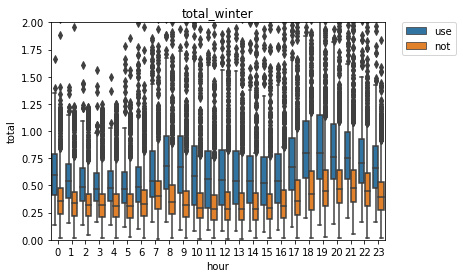

In [80]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

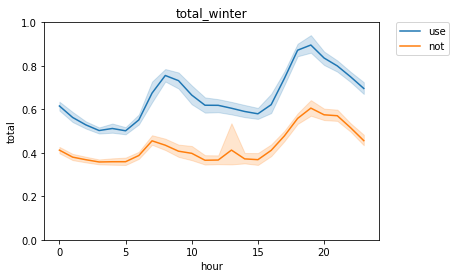

In [81]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

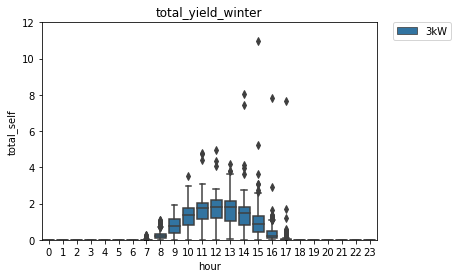

In [82]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

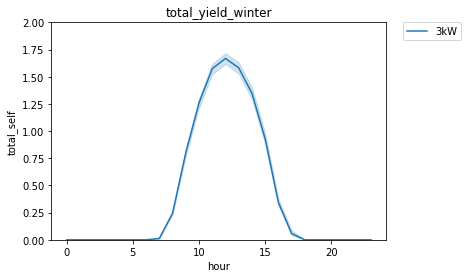

In [83]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

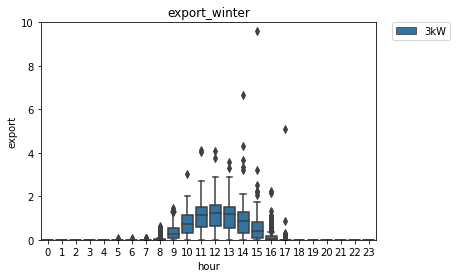

In [84]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

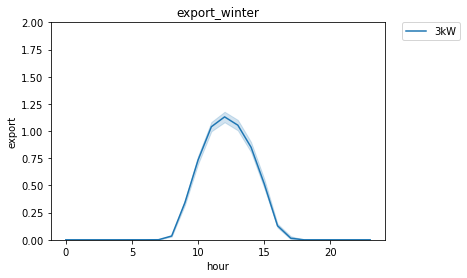

In [85]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

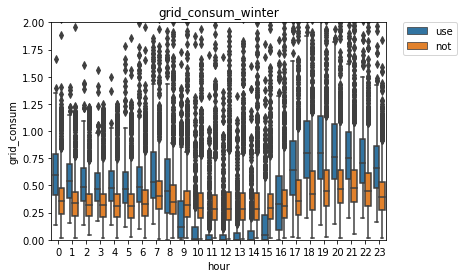

In [86]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

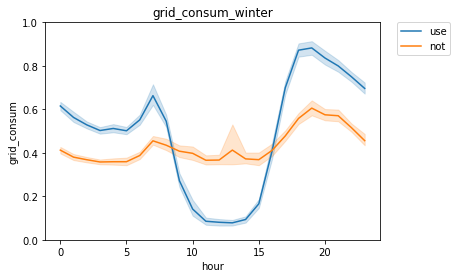

In [87]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

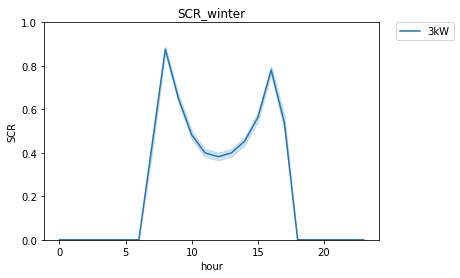

In [88]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_winter')
plt.show()

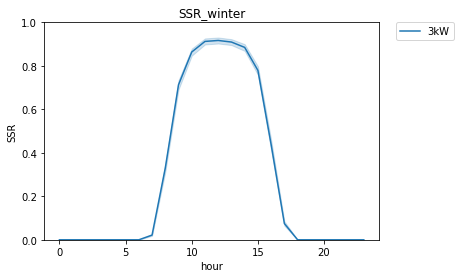

In [89]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_winter')
plt.show()

<hr>

## **<1년(total)>**

### 2021.05 ~ 2022.04

In [90]:
df_all_hour_year = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') |
                              (df_all_hour.ym == '2021/8') | (df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') |
                              (df_all_hour.ym == '2021/11') | (df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') |
                              (df_all_hour.ym == '2022/2') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [91]:
# 총 전력 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   6180.0  0.392641  0.367400  0.019897  0.219971  0.320068  0.460083   
     1   6198.0  0.360639  0.298882  0.019897  0.209961  0.299927  0.420166   
     2   6189.0  0.336652  0.233026  0.030029  0.199951  0.289795  0.399902   
     3   6200.0  0.325111  0.225162  0.020020  0.190002  0.279907  0.389893   
     4   6205.0  0.315723  0.232330  0.020020  0.180054  0.270020  0.379883   
     5   6166.0  0.319376  0.314468  0.029907  0.179932  0.260010  0.380005   
     6   6174.0  0.364238  0.762832  0.020020  0.200073  0.299927  0.420044   
     7   6163.0  0.422360  0.416753  0.010010  0.250000  0.359985  0.489990   
     8   6193.0  0.383552  0.397327  0.010010  0.219727  0.319824  0.449951   
     9   6180.0  0.357842  0.463775  0.019958  0.190002  0.290039  0.410034   
     10  6194.0  0.355409  0.712906  0.010010  0.180054  0.279785  0.390137   
     11  6177.0  0.353305  0.844250  0.020020  0.169922  0.260010  0.390137   
     12  6164.0  0.350219  0.390660  0.010010  0.169983  0.270020  0.410034   
     13  6167.0  0.365876  1.254727  0.010010  0.169983  0.260254  0.400146   
     14  6166.0  0.362632  0.792342  0.019897  0.170044  0.270020  0.399902   
     15  6164.0  0.356115  0.480333  0.019897  0.179932  0.279907  0.399902   
     16  6158.0  0.381266  0.533831  0.019958  0.189941  0.290039  0.420044   
     17  6162.0  0.425628  0.461314  0.019897  0.200073  0.319946  0.489990   
     18  6128.0  0.493828  0.483407  0.019897  0.229980  0.359985  0.570068   
     19  6160.0  0.547371  0.662090  0.019958  0.270020  0.400024  0.609863   
     20  6145.0  0.552926  0.492383  0.020020  0.310059  0.439941  0.620117   
     21  6154.0  0.553631  0.529421  0.039978  0.329834  0.440186  0.619995   
     22  6187.0  0.492463  0.390331  0.020020  0.290039  0.409973  0.580078   
     23  6177.0  0.427288  0.373109  0.020020  0.239990  0.359863  0.510010   
use  0   2865.0  0.541612  0.298690  0.140015  0.320068  0.489990  0.699951   
     1   2862.0  0.499567  0.315556  0.139954  0.299988  0.449951  0.630127   
     2   2871.0  0.458393  0.225248  0.130005  0.289917  0.420166  0.589966   
     3   2863.0  0.439165  0.215650  0.100098  0.270020  0.409912  0.559967   
     4   2853.0  0.432534  0.223103  0.130005  0.260010  0.409912  0.559570   
     5   2852.0  0.435512  0.215522  0.119995  0.260010  0.400146  0.549805   
     6   2836.0  0.485590  0.330263  0.099976  0.270020  0.420044  0.596069   
     7   2832.0  0.588108  0.506909  0.109863  0.329956  0.489807  0.709961   
     8   2843.0  0.636464  0.440665  0.100037  0.379898  0.550049  0.780121   
     9   2847.0  0.573550  0.406183  0.080078  0.300049  0.489929  0.740112   
     10  2848.0  0.524529  0.424120  0.070312  0.260010  0.439972  0.679932   
     11  2833.0  0.528730  0.441918  0.050537  0.250244  0.430054  0.679810   
     12  2835.0  0.560432  0.447315  0.079834  0.270020  0.459839  0.710144   
     13  2834.0  0.552591  0.402549  0.060059  0.279968  0.460083  0.689941   
     14  2839.0  0.536843  0.403813  0.026428  0.270020  0.440063  0.669739   
     15  2847.0  0.536876  0.489831  0.070068  0.270020  0.440186  0.650055   
     16  2864.0  0.558035  0.512879  0.089844  0.289917  0.459961  0.670021   
     17  2860.0  0.634295  0.456611  0.109863  0.359985  0.529846  0.790283   
     18  2855.0  0.745964  0.435248  0.150146  0.439957  0.649902  0.930176   
     19  2859.0  0.797783  0.504138  0.129944  0.459961  0.660156  1.030014   
     20  2856.0  0.764702  0.448238  0.149902  0.459961  0.640137  0.979980   
     21  2848.0  0.729860  0.380862  0.149994  0.460205  0.640015  0.939941   
     22  2854.0  0.688746  0.381310  0.150146  0.429993  0.610107  0.860107   
     23  2854.0  0.614817  0.351978  0.140015  0.369995  0.550049  0.779953   

               max  
type 시간             
not  0   12.57006

In [92]:
# 총 전력 생산량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.001764  0.009467  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.039281  0.074039  0.0  0.000000  0.000000  0.050049   
         7   2832.0  0.184735  0.223253  0.0  0.010010  0.109863  0.289978   
         8   2843.0  0.522059  0.405585  0.0  0.189941  0.440186  0.770020   
         9   2847.0  0.968697  0.564786  0.0  0.500000  0.959961  1.409912   
         10  2848.0  1.314582  0.659293  0.0  0.800018  1.410034  1.839844   
         11  2833.0  1.518280  0.717223  0.0  0.959961  1.689941  2.060059   
         12  2835.0  1.588936  0.754363  0.0  1.030029  1.760010  2.160156   
         13  2834.0  1.512568  0.748922  0.0  0.950027  1.670044  2.079834   
         14  2839.0  1.327566  0.761777  0.0  0.750000  1.439941  1.839844   
         15  2847.0  0.997269  0.689136  0.0  0.489990  0.989990  1.439941   
         16  2864.0  0.570109  0.567150  0.0  0.170166  0.471802  0.889893   
         17  2860.0  0.221461  0.407217  0.0  0.010010  0.129883  0.350037   
         18  2855.0  0.044482  0.082321  0.0  0.000000  0.000000  0.069946   
         19  2859.0  0.003071  0.017049  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.391602  
         6    0.760010  
         7    1.449951  
         8    2.059998  
         9    3.270020  
         10   4.100037  
         11   6.339844  
         12   8.669922  
         13   9.620117  
         14  11.100037  
         15  11.300049  
         16  11.000000  
         17  12.609985  
         18   1.599243  
         19   0.704712  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [93]:
# 총 전력 수출량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.000026  0.001239  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.003677  0.020578  0.0  0.000000  0.000000  0.000000   
         7   2832.0  0.043963  0.114523  0.0  0.000000  0.000000  0.029907   
         8   2843.0  0.208013  0.293540  0.0  0.000000  0.069946  0.320038   
         9   2847.0  0.558877  0.494810  0.0  0.100098  0.459961  0.909912   
         10  2848.0  0.884602  0.617020  0.0  0.330063  0.900024  1.359985   
         11  2833.0  1.071567  0.681228  0.0  0.469971  1.160034  1.590088   
         12  2835.0  1.119485  0.714917  0.0  0.500000  1.210083  1.675049   
         13  2834.0  1.048757  0.699974  0.0  0.430054  1.119934  1.599976   
         14  2839.0  0.887889  0.687098  0.0  0.299927  0.889954  1.379883   
         15  2847.0  0.601755  0.586262  0.0  0.119873  0.510010  0.970032   
         16  2864.0  0.272843  0.390469  0.0  0.000000  0.120056  0.430054   
         17  2860.0  0.061230  0.218873  0.0  0.000000  0.000000  0.040039   
         18  2855.0  0.001732  0.011582  0.0  0.000000  0.000000  0.000000   
         19  2859.0  0.000062  0.002302  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.065430  
         6   0.400024  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  4.829834  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  9.610107  
         16  6.940002  
         17  6.169922  
         18  0.429932  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [94]:
# 총 그리드 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   6180.0  0.392641  0.367400  0.019897  0.219971  0.320068  0.460083   
     1   6198.0  0.360639  0.298882  0.019897  0.209961  0.299927  0.420166   
     2   6189.0  0.336652  0.233026  0.030029  0.199951  0.289795  0.399902   
     3   6200.0  0.325111  0.225162  0.020020  0.190002  0.279907  0.389893   
     4   6205.0  0.315723  0.232330  0.020020  0.180054  0.270020  0.379883   
     5   6166.0  0.319376  0.314468  0.029907  0.179932  0.260010  0.380005   
     6   6174.0  0.364238  0.762832  0.020020  0.200073  0.299927  0.420044   
     7   6163.0  0.422360  0.416753  0.010010  0.250000  0.359985  0.489990   
     8   6193.0  0.383552  0.397327  0.010010  0.219727  0.319824  0.449951   
     9   6180.0  0.357842  0.463775  0.019958  0.190002  0.290039  0.410034   
     10  6194.0  0.355409  0.712906  0.010010  0.180054  0.279785  0.390137   
     11  6177.0  0.353305  0.844250  0.020020  0.169922  0.260010  0.390137   
     12  6164.0  0.350219  0.390660  0.010010  0.169983  0.270020  0.410034   
     13  6167.0  0.365876  1.254727  0.010010  0.169983  0.260254  0.400146   
     14  6166.0  0.362632  0.792342  0.019897  0.170044  0.270020  0.399902   
     15  6164.0  0.356115  0.480333  0.019897  0.179932  0.279907  0.399902   
     16  6158.0  0.381266  0.533831  0.019958  0.189941  0.290039  0.420044   
     17  6162.0  0.425628  0.461314  0.019897  0.200073  0.319946  0.489990   
     18  6128.0  0.493828  0.483407  0.019897  0.229980  0.359985  0.570068   
     19  6160.0  0.547371  0.662090  0.019958  0.270020  0.400024  0.609863   
     20  6145.0  0.552926  0.492383  0.020020  0.310059  0.439941  0.620117   
     21  6154.0  0.553631  0.529421  0.039978  0.329834  0.440186  0.619995   
     22  6187.0  0.492463  0.390331  0.020020  0.290039  0.409973  0.580078   
     23  6177.0  0.427288  0.373109  0.020020  0.239990  0.359863  0.510010   
use  0   2865.0  0.541757  0.298817  0.140015  0.320068  0.489990  0.699951   
     1   2862.0  0.498745  0.297407  0.139954  0.299988  0.449951  0.630127   
     2   2871.0  0.458440  0.225228  0.130005  0.289917  0.420166  0.589966   
     3   2863.0  0.439188  0.215624  0.100098  0.270020  0.409912  0.559967   
     4   2853.0  0.432556  0.223078  0.130005  0.260010  0.409912  0.559570   
     5   2852.0  0.433774  0.215460  0.119995  0.260010  0.400024  0.549805   
     6   2836.0  0.449986  0.338480  0.010010  0.239990  0.390076  0.569977   
     7   2832.0  0.447337  0.525273  0.000000  0.170044  0.349976  0.579956   
     8   2843.0  0.322418  0.437428  0.000000  0.040039  0.199982  0.469971   
     9   2847.0  0.163729  0.326510  0.000000  0.000000  0.029999  0.190247   
     10  2848.0  0.094550  0.294369  0.000000  0.000000  0.000000  0.059998   
     11  2833.0  0.082017  0.263611  0.000000  0.000000  0.000000  0.039917   
     12  2835.0  0.090981  0.268970  0.000000  0.000000  0.000000  0.049927   
     13  2834.0  0.088780  0.218988  0.000000  0.000000  0.000000  0.059814   
     14  2839.0  0.097166  0.230556  0.000000  0.000000  0.000000  0.070007   
     15  2847.0  0.141362  0.316481  0.000000  0.000000  0.020020  0.160156   
     16  2864.0  0.260769  0.383255  0.000000  0.010010  0.114990  0.392578   
     17  2860.0  0.474064  0.417492  0.000000  0.160034  0.380005  0.689941   
     18  2855.0  0.703221  0.441578  0.029968  0.390015  0.610107  0.904907   
     19  2859.0  0.791474  0.470626  0.129944  0.459961  0.660034  1.029785   
     20  2856.0  0.764748  0.448219  0.149902  0.459961  0.640137  0.979980   
     21  2848.0  0.730141  0.381135  0.149994  0.460205  0.640015  0.939941   
     22  2854.0  0.688626  0.379321  0.150146  0.429993  0.610107  0.860107   
     23  2854.0  0.615200  0.353809  0.140015  0.369995  0.550049  0.779953   

               max  
type 시간             
not  0   12.57006

In [95]:
# SCR(자가소비율)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.102326  0.303049  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.440904  0.485043  0.0  0.000000  0.000000  1.000000   
         7   2832.0  0.726336  0.379279  0.0  0.580983  0.949939  1.000000   
         8   2843.0  0.726390  0.276127  0.0  0.513162  0.805763  1.000000   
         9   2847.0  0.535568  0.294841  0.0  0.273293  0.494500  0.800918   
         10  2848.0  0.422325  0.285325  0.0  0.184347  0.339413  0.608553   
         11  2833.0  0.380241  0.276202  0.0  0.155953  0.293896  0.526350   
         12  2835.0  0.379939  0.271576  0.0  0.161512  0.298137  0.521158   
         13  2834.0  0.395011  0.272635  0.0  0.177542  0.317489  0.551665   
         14  2839.0  0.431425  0.282471  0.0  0.197888  0.357597  0.613884   
         15  2847.0  0.518080  0.296297  0.0  0.258130  0.465178  0.772326   
         16  2864.0  0.675776  0.294937  0.0  0.430403  0.714628  1.000000   
         17  2860.0  0.702338  0.383706  0.0  0.448100  0.916815  1.000000   
         18  2855.0  0.466590  0.491819  0.0  0.000000  0.000000  1.000000   
         19  2859.0  0.137876  0.344516  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

             max  
설비용량(kW) 시간       
3kW      0   0.0  
         1   0.0  
         2   0.0  
         3   0.0  
         4   0.0  
         5   1.0  
         6   1.0  
         7   1.0  
         8   1.0  
         9   1.0  
         10  1.0  
         11  1.0  
         12  1.0  
         13  1.0  
         14  1.0  
         15  1.0  
         16  1.0  
         17  1.0  
         18  1.0  
         19  1.0  
         20  0.0  
         21  0.0  
         22  0.0  
         23  0.0

In [96]:
# SSR(자가공급률)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   2865.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   2852.0  0.004687  0.018622  0.0  0.000000  0.000000  0.000000   
         6   2836.0  0.097816  0.174925  0.0  0.000000  0.000000  0.115493   
         7   2832.0  0.311208  0.315211  0.0  0.024358  0.200000  0.559406   
         8   2843.0  0.583982  0.326516  0.0  0.297114  0.615493  0.907364   
         9   2847.0  0.796865  0.277888  0.0  0.686774  0.939483  1.000000   
         10  2848.0  0.882110  0.228364  0.0  0.894900  1.000000  1.000000   
         11  2833.0  0.904336  0.205733  0.0  0.935338  1.000000  1.000000   
         12  2835.0  0.900826  0.202226  0.0  0.913994  1.000000  1.000000   
         13  2834.0  0.894774  0.204183  0.0  0.896934  1.000000  1.000000   
         14  2839.0  0.877952  0.221687  0.0  0.864392  1.000000  1.000000   
         15  2847.0  0.815696  0.260649  0.0  0.714370  0.956476  1.000000   
         16  2864.0  0.631765  0.338286  0.0  0.324757  0.722095  0.959971   
         17  2860.0  0.327460  0.327630  0.0  0.022752  0.207571  0.591178   
         18  2855.0  0.085487  0.152577  0.0  0.000000  0.000000  0.109891   
         19  2859.0  0.005396  0.022327  0.0  0.000000  0.000000  0.000000   
         20  2856.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  2848.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  2854.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.975588  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.917613  
         19  0.501673  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

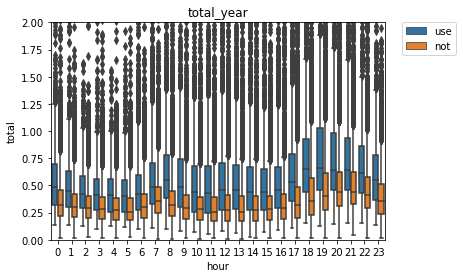

In [97]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

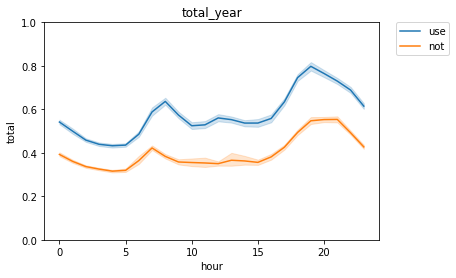

In [98]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

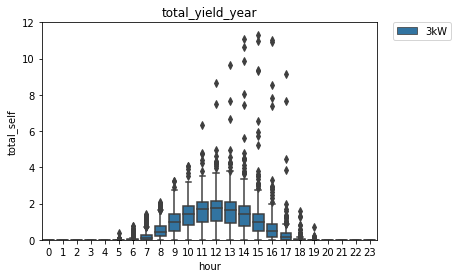

In [99]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

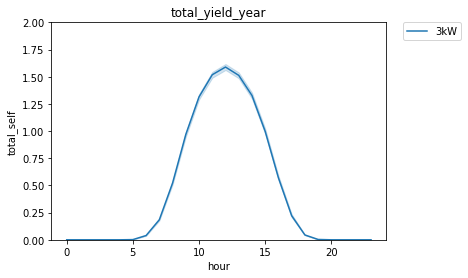

In [100]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

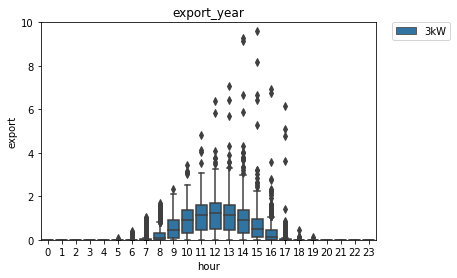

In [101]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

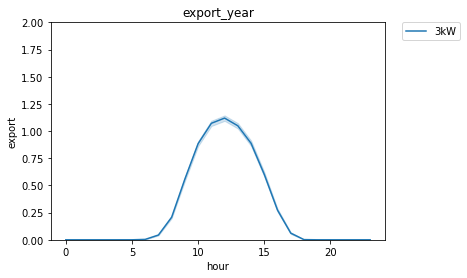

In [102]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

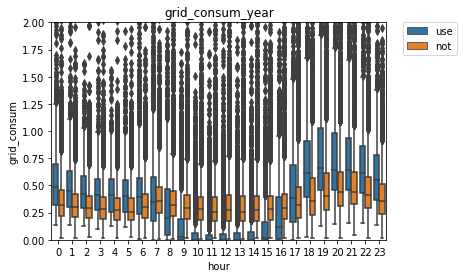

In [103]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

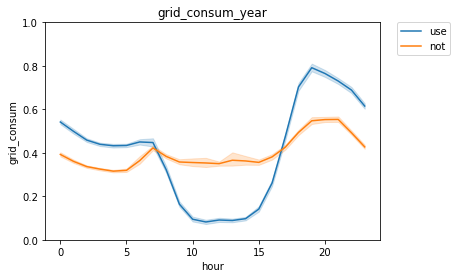

In [104]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

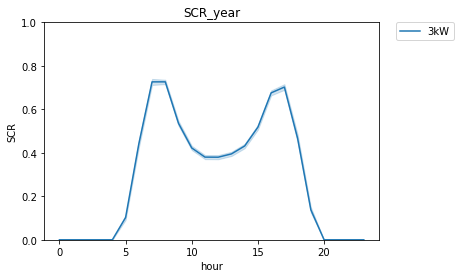

In [105]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_year')
plt.show()

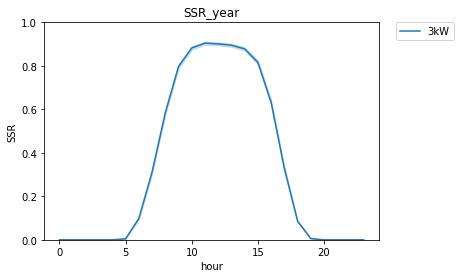

In [106]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_year')
plt.show()